In [1]:
import pandas as pd
import re

## Helper functions for data extraction, pandas joins and etc.

In [2]:
def get_task_dir_name(target_file):
    return target_file.split(".")[0]

def convert_to_python_filename(task_name):
    snake_case = "_".join(re.split(r'[^a-zA-Z0-9]+', task_name.lower()))
    return snake_case + ".py"

def get_llm_model_name(filename):
    for model_name in ["deepseek_coder", "gpt_4o_2024_08_06", "gemini_1_5_pro"]:
        if model_name in filename:
            return model_name

## Load all data sources

In [3]:
adequacy_stats = "../reference_data/combined_stats.csv"
attribute_stats = "../reference_data/filtered_Python.csv"
mutation_stats = "./per_suite.csv"

df_suite = pd.read_csv(mutation_stats)
python_data = pd.read_csv(attribute_stats)
classic_adequacy_df_results = pd.read_csv(adequacy_stats)

In [4]:
df_suite.describe()

mutation_score  time_elapsed  all_mutants      killed    survived  \
count      280.000000    350.000000   350.000000  350.000000  350.000000   
mean         0.539384      9.622162    12.997143    4.057143    4.385714   
std          0.419181     18.596133    14.308212    7.004472    8.312129   
min          0.000000      0.003528     0.000000    0.000000    0.000000   
25%          0.000000      0.121818     4.000000    0.000000    0.000000   
50%          0.612500      0.588396     8.000000    1.000000    1.000000   
75%          1.000000     10.980203    17.000000    5.000000    5.000000   
max          1.000000    111.490979    78.000000   46.000000   74.000000   

       incompetent     timeout  rapfd_score  random_rapfd_score  tests_passed  \
count   350.000000  350.000000   280.000000          280.000000    350.000000   
mean      3.868571    0.685714     0.193102            0.207070      3.171429   
std       6.515126    1.598198     0.201419            0.207813      2.814063   
min       0.000000    0.000000     0.000000            0.000000      0.000000   
25%       0.000000    0.000000     0.000000            0.000000      1.000000   
50%       2.000000    0.000000     0.133333            0.153333      3.000000   
75%       5.000000    0.000000     0.345000            0.378070      5.000000   
max      42.000000   11.000000     0.800000            0.800000     12.000000   

       tests_failed  
count    350.000000  
mean       2.025714  
std        2.539526  
min        0.000000  
25%        0.000000  
50%        1.000000  
75%        3.000000  
max       16.000000

In [5]:
df_suite[ df_suite.all_mutants - df_suite.incompetent == 0 ]

test_module_name  \
19                      test_deepseek_coder_hash_join   
20                  test_gemini_1_5_pro_002_hash_join   
21                   test_gpt_4o_2024_08_06_hash_join   
22   test_gemini_1_5_pro_002_hello_world_line_printer   
23    test_gpt_4o_2024_08_06_hello_world_line_printer   
..                                                ...   
336                     test_deepseek_coder_file_size   
337                 test_gemini_1_5_pro_002_file_size   
338       test_deepseek_coder_find_limit_of_recursion   
339   test_gemini_1_5_pro_002_find_limit_of_recursion   
340    test_gpt_4o_2024_08_06_find_limit_of_recursion   

                     target_file  mutation_score  time_elapsed  all_mutants  \
19                  hash_join.py             NaN      0.030107            0   
20                  hash_join.py             NaN      0.029975            0   
21                  hash_join.py             NaN      0.027437            0   
22   hello_world_line_printer.py             NaN      0.008876            0   
23   hello_world_line_printer.py             NaN      0.008250            0   
..                           ...             ...           ...          ...   
336                 file_size.py             NaN      0.009766            0   
337                 file_size.py             NaN      0.009437            0   
338   find_limit_of_recursion.py             NaN      0.006893            0   
339   find_limit_of_recursion.py             NaN      0.004047            0   
340   find_limit_of_recursion.py             NaN      0.003528            0   

     killed  survived  incompetent  timeout  rapfd_score  random_rapfd_score  \
19        0         0            0        0          NaN                 NaN   
20        0         0            0        0          NaN                 NaN   
21        0         0            0        0          NaN                 NaN   
22        0         0            0        0          NaN                 NaN   
23        0         0            0        0          NaN                 NaN   
..      ...       ...          ...      ...          ...                 ...   
336       0         0            0        0          NaN                 NaN   
337       0         0            0        0          NaN                 NaN   
338       0         0            0        0          NaN                 NaN   
339       0         0            0        0          NaN                 NaN   
340       0         0            0        0          NaN                 NaN   

     tests_passed  tests_failed  
19              1             0  
20              5             0  
21              5             0  
22              0             1  
23              1             0  
..            ...           ...  
336             0             3  
337             1             2  
338             1             2  
339             0             1  
340             1             0  

[70 rows x 13 columns]

In [6]:
df_suite[ (df_suite.killed != 0) | df_suite.survived != 0 ]

test_module_name  \
0                 test_gpt_4o_2024_08_06_four_is_magic   
1                         test_deepseek_coder_fractran   
2                      test_gpt_4o_2024_08_06_fractran   
3                    test_deepseek_coder_fusc_sequence   
4                test_gemini_1_5_pro_002_fusc_sequence   
..                                                 ...   
345  test_gemini_1_5_pro_002_find_the_intersection_...   
346  test_gpt_4o_2024_08_06_find_the_intersection_o...   
347                        test_deepseek_coder_fivenum   
348                    test_gemini_1_5_pro_002_fivenum   
349                     test_gpt_4o_2024_08_06_fivenum   

                               target_file  mutation_score  time_elapsed  \
0                         four_is_magic.py        0.000000      6.134086   
1                              fractran.py        0.000000      0.189423   
2                              fractran.py        1.000000      0.170111   
3                         fusc_sequence.py        0.000000      3.269192   
4                         fusc_sequence.py        0.500000      1.645551   
..                                     ...             ...           ...   
345  find_the_intersection_of_two_lines.py        0.914894      1.253059   
346  find_the_intersection_of_two_lines.py        0.765957      1.724014   
347                             fivenum.py        0.533333      0.804018   
348                             fivenum.py        0.533333      0.949056   
349                             fivenum.py        0.466667      0.944354   

     all_mutants  killed  survived  incompetent  timeout  rapfd_score  \
0             78       0        74            4        0     0.000000   
1              8       0         6            2        0     0.000000   
2              8       6         0            2        0     0.600000   
3              6       0         2            4        0     0.000000   
4              6       1         1            4        0     0.133333   
..           ...     ...       ...          ...      ...          ...   
345           47      43         4            0        0     0.370213   
346           47      36        11            0        0     0.612766   
347           24       8         7            9        0     0.233333   
348           24       8         7            9        0     0.233333   
349           24       7         8            9        0     0.100000   

     random_rapfd_score  tests_passed  tests_failed  
0              0.000000             0            14  
1              0.000000             0             7  
2              0.600000             5             0  
3              0.000000             0             2  
4              0.066667             3             3  
..                  ...           ...           ...  
345            0.404255             7             0  
346            0.476596             3             1  
347            0.233333             8             2  
348            0.175000             3             4  
349            0.133333             5             3  

[276 rows x 13 columns]

In [7]:
per_test = pd.read_csv("per_test.csv")
per_test

test_name  per_test_score  \
0     test_gpt_4o_2024_08_06_four_is_magic.TestMagic...        0.000000   
1     test_gpt_4o_2024_08_06_four_is_magic.TestMagic...        0.000000   
2     test_gpt_4o_2024_08_06_four_is_magic.TestMagic...        0.000000   
3     test_gpt_4o_2024_08_06_four_is_magic.TestMagic...        0.000000   
4     test_gpt_4o_2024_08_06_four_is_magic.TestMagic...        0.000000   
...                                                 ...             ...   
1814  test_gpt_4o_2024_08_06_fivenum.TestFiveNum.tes...        0.208333   
1815  test_gpt_4o_2024_08_06_fivenum.TestFiveNum.tes...        0.250000   
1816  test_gpt_4o_2024_08_06_fivenum.TestFiveNum.tes...        0.041667   
1817  test_gpt_4o_2024_08_06_fivenum.TestFiveNum.tes...        0.041667   
1818  test_gpt_4o_2024_08_06_fivenum.TestFiveNum.tes...        0.000000   

      is_failed  
0          True  
1          True  
2          True  
3          True  
4          True  
...         ...  
1814      False  
1815      False  
1816       True  
1817       True  
1818       True  

[1819 rows x 3 columns]

## Preprocess data

In [8]:
python_data["task_name"] = python_data.task_name.apply(lambda x: get_task_dir_name(convert_to_python_filename(x)))
df_suite["task_name"] = df_suite.target_file.apply(get_task_dir_name)
df_suite["llm_model"] = df_suite.test_module_name.apply(lambda x: get_llm_model_name(x))

classic_adequacy_df_results.task_name = classic_adequacy_df_results.task_name.apply(lambda x: get_task_dir_name(convert_to_python_filename(x)))
is_python = classic_adequacy_df_results.language_name == "Python"
python_classic_adequacy_df_results = classic_adequacy_df_results[ is_python ]

## Merge into common metrics dataframe

In order to answer research questions, we need to join our computed mutpy runs data
with previous statistical data of classic adequacy testing metrics and code attributes,
so that we get data entries:
    - for every test file (row): MT metrics, Classic metrics, Code attributes 

In [9]:
benchmark_df = df_suite.copy()
benchmark_df["target_code_length"] = None
benchmark_df["target_line_count"] = None


valuable_columns = [
    "line_coverage_score",
    "branch_coverage_score",
    "assertions_mccabe_ratio_score",
    "assertions_density_score",
    "warnings_count_score"
]

# Merge them into X based on 'id'
benchmark_df = benchmark_df.merge(python_classic_adequacy_df_results, on=["llm_model","task_name"], how='left')
overall_df = benchmark_df.merge(python_data, on=["task_name"], how='left')
overall_df.llm_model = overall_df.llm_model.astype('category')

overall_df

test_module_name  \
0                 test_gpt_4o_2024_08_06_four_is_magic   
1                         test_deepseek_coder_fractran   
2                      test_gpt_4o_2024_08_06_fractran   
3                    test_deepseek_coder_fusc_sequence   
4                test_gemini_1_5_pro_002_fusc_sequence   
..                                                 ...   
345  test_gemini_1_5_pro_002_find_the_intersection_...   
346  test_gpt_4o_2024_08_06_find_the_intersection_o...   
347                        test_deepseek_coder_fivenum   
348                    test_gemini_1_5_pro_002_fivenum   
349                     test_gpt_4o_2024_08_06_fivenum   

                               target_file  mutation_score  time_elapsed  \
0                         four_is_magic.py        0.000000      6.134086   
1                              fractran.py        0.000000      0.189423   
2                              fractran.py        1.000000      0.170111   
3                         fusc_sequence.py        0.000000      3.269192   
4                         fusc_sequence.py        0.500000      1.645551   
..                                     ...             ...           ...   
345  find_the_intersection_of_two_lines.py        0.914894      1.253059   
346  find_the_intersection_of_two_lines.py        0.765957      1.724014   
347                             fivenum.py        0.533333      0.804018   
348                             fivenum.py        0.533333      0.949056   
349                             fivenum.py        0.466667      0.944354   

     all_mutants  killed  survived  incompetent  timeout  rapfd_score  ...  \
0             78       0        74            4        0     0.000000  ...   
1              8       0         6            2        0     0.000000  ...   
2              8       6         0            2        0     0.600000  ...   
3              6       0         2            4        0     0.000000  ...   
4              6       1         1            4        0     0.133333  ...   
..           ...     ...       ...          ...      ...          ...  ...   
345           47      43         4            0        0     0.370213  ...   
346           47      36        11            0        0     0.612766  ...   
347           24       8         7            9        0     0.233333  ...   
348           24       8         7            9        0     0.233333  ...   
349           24       7         8            9        0     0.100000  ...   

     timeout_occurred  Unnamed: 0  \
0               False     53258.0   
1               False     52466.0   
2               False     52466.0   
3               False     52301.0   
4                 NaN     52301.0   
..                ...         ...   
345               NaN     54265.0   
346             False     54265.0   
347             False     53922.0   
348               NaN     53922.0   
349             False     53922.0   

                                              task_url  \
0            http://rosettacode.org/wiki/Four_is_magic   
1                 http://rosettacode.org/wiki/Fractran   
2                 http://rosettacode.org/wiki/Fractran   
3            http://rosettacode.org/wiki/Fusc_sequence   
4            http://rosettacode.org/wiki/Fusc_sequence   
..                                                 ...   
345  http://rosettacode.org/wiki/Find_the_intersect...   
346  http://rosettacode.org/wiki/Find_the_intersect...   
347                http://rosettacode.org/wiki/Fivenum   
348                http://rosettacode.org/wiki/Fivenum   
349                http://rosettacode.org/wiki/Fivenum   

                                      task_description language_url  \
0    Task\n\nWrite a subroutine, function, whatever...      #Python   
1    FRACTRAN is a Turing-complete esoteric program...      #Python   
2    FRACTRAN is a Turing-complete esoteric program...      #Python   
3    \n\nDefinitions\n\nThe   fusc   integer sequen...      #Pyth

In [10]:
overall_df.to_csv("output/combined_test_metrics.csv")

In [11]:

selected_columns = ["tests_passed", "tests_failed", "mutation_score", "rapfd_score", "random_rapfd_score", "branch_coverage_score", "assertions_density_score", "warnings_count_score", "assertions_mccabe_ratio_score", "line_coverage_score", "code_length", "line_count"]
df = overall_df[selected_columns]
spearman_corr = df.corr(method="spearman")
print(spearman_corr)

                               tests_passed  tests_failed  mutation_score  \
tests_passed                       1.000000     -0.507887        0.578929   
tests_failed                      -0.507887      1.000000       -0.351309   
mutation_score                     0.578929     -0.351309        1.000000   
rapfd_score                        0.488033     -0.376741        0.745863   
random_rapfd_score                 0.511673     -0.384073        0.757488   
branch_coverage_score              0.552120     -0.319369        0.585095   
assertions_density_score           0.161113      0.135300        0.202957   
warnings_count_score              -0.022718     -0.448225        0.236130   
assertions_mccabe_ratio_score      0.121251      0.232117        0.119650   
line_coverage_score                0.550325     -0.321471        0.598565   
code_length                        0.064865      0.214570        0.064011   
line_count                         0.018820      0.221303        0.068716   

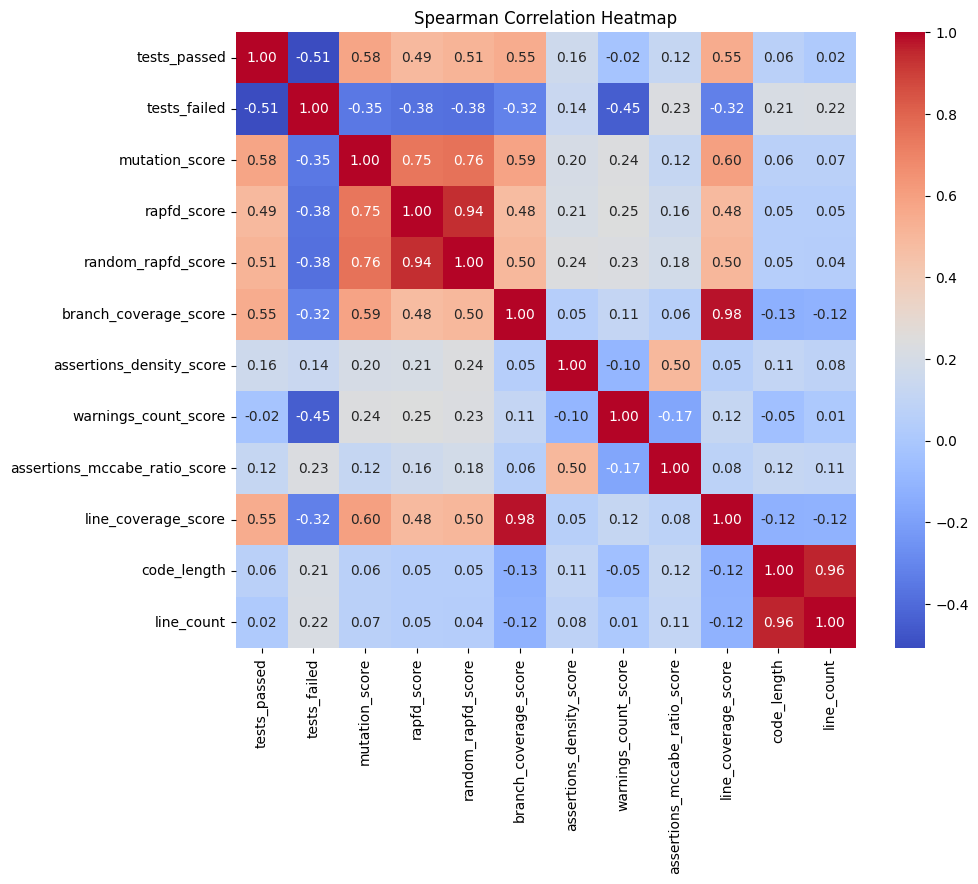

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

# Compute Spearman correlation
spearman_corr = df.corr(method="spearman")

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Spearman Correlation Heatmap")
plt.show()

In [13]:
df_clean = df.dropna()
for metric in selected_columns:
    rho, pval = spearmanr(df_clean['mutation_score'], df_clean[metric])
    print(f"MutationScore-{metric} Spearman's rho: {rho:.3f}, p-value: {pval:.4f} ({pval})")

MutationScore-tests_passed Spearman's rho: 0.620, p-value: 0.0000 (1.3737604331139615e-21)
MutationScore-tests_failed Spearman's rho: -0.392, p-value: 0.0000 (2.2761762873596796e-08)
MutationScore-mutation_score Spearman's rho: 1.000, p-value: 0.0000 (0.0)
MutationScore-rapfd_score Spearman's rho: 0.797, p-value: 0.0000 (4.849739674459411e-43)
MutationScore-random_rapfd_score Spearman's rho: 0.804, p-value: 0.0000 (2.2573032919472485e-44)
MutationScore-branch_coverage_score Spearman's rho: 0.585, p-value: 0.0000 (7.676464174081697e-19)
MutationScore-assertions_density_score Spearman's rho: 0.203, p-value: 0.0050 (0.004978957443226964)
MutationScore-warnings_count_score Spearman's rho: 0.236, p-value: 0.0010 (0.0010385889171175135)
MutationScore-assertions_mccabe_ratio_score Spearman's rho: 0.120, p-value: 0.1001 (0.10011697978483218)
MutationScore-line_coverage_score Spearman's rho: 0.599, p-value: 0.0000 (7.475791974541375e-20)
MutationScore-code_length Spearman's rho: 0.079, p-value:

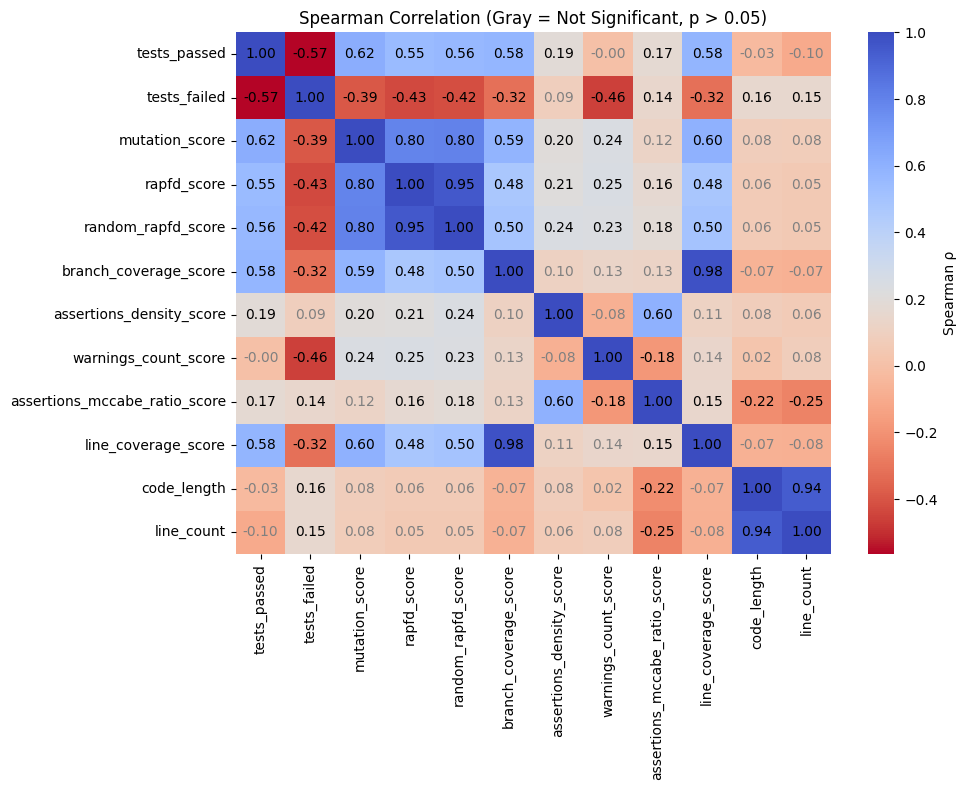

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
import numpy as np

# Step 1: Compute correlation and p-value matrices
cols = df_clean.columns
n = len(cols)
corr_matrix = pd.DataFrame(np.zeros((n, n)), columns=cols, index=cols)
pval_matrix = pd.DataFrame(np.zeros((n, n)), columns=cols, index=cols)

for i in range(n):
    for j in range(n):
        col1, col2 = cols[i], cols[j]
        rho, pval = spearmanr(df_clean[col1], df_clean[col2])
        corr_matrix.iloc[i, j] = rho
        pval_matrix.iloc[i, j] = pval

# Step 2: Create custom annotation and text color mask
annot = corr_matrix.copy().astype(str)
text_colors = np.full((n, n), "black")  # default: black

for i in range(n):
    for j in range(n):
        rho = corr_matrix.iloc[i, j]
        pval = pval_matrix.iloc[i, j]
        annot.iloc[i, j] = f"{rho:.2f}"
        if pval > 0.05:
            text_colors[i, j] = "grey"  # grey out non-significant

# Step 3: Plot with seaborn and custom text colors
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=annot,
    fmt="",
    cmap="coolwarm_r",
    cbar_kws={'label': "Spearman ρ"},
    annot_kws={"size": 10},
)

# Manually set text colors (requires matplotlib access to the plot)
ax = plt.gca()
for t, color in zip(ax.texts, text_colors.flatten()):
    t.set_color(color)

plt.title("Spearman Correlation (Gray = Not Significant, p > 0.05)")
plt.tight_layout()
plt.savefig("image/correlation_heatmap_with_pval", bbox_inches='tight')
plt.show()


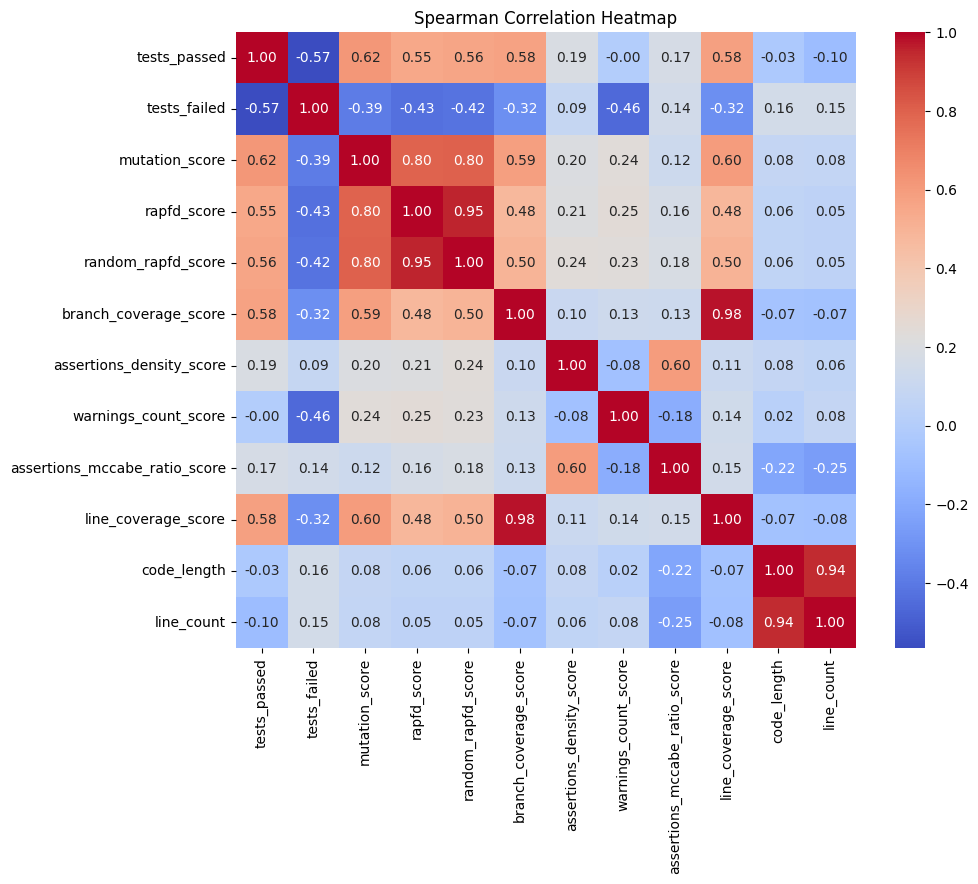

In [15]:
spearman_corr_clean = df_clean.corr(method="spearman")

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr_clean, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Spearman Correlation Heatmap")

plt.savefig("image/correlation_heatmap", bbox_inches='tight')

plt.show()

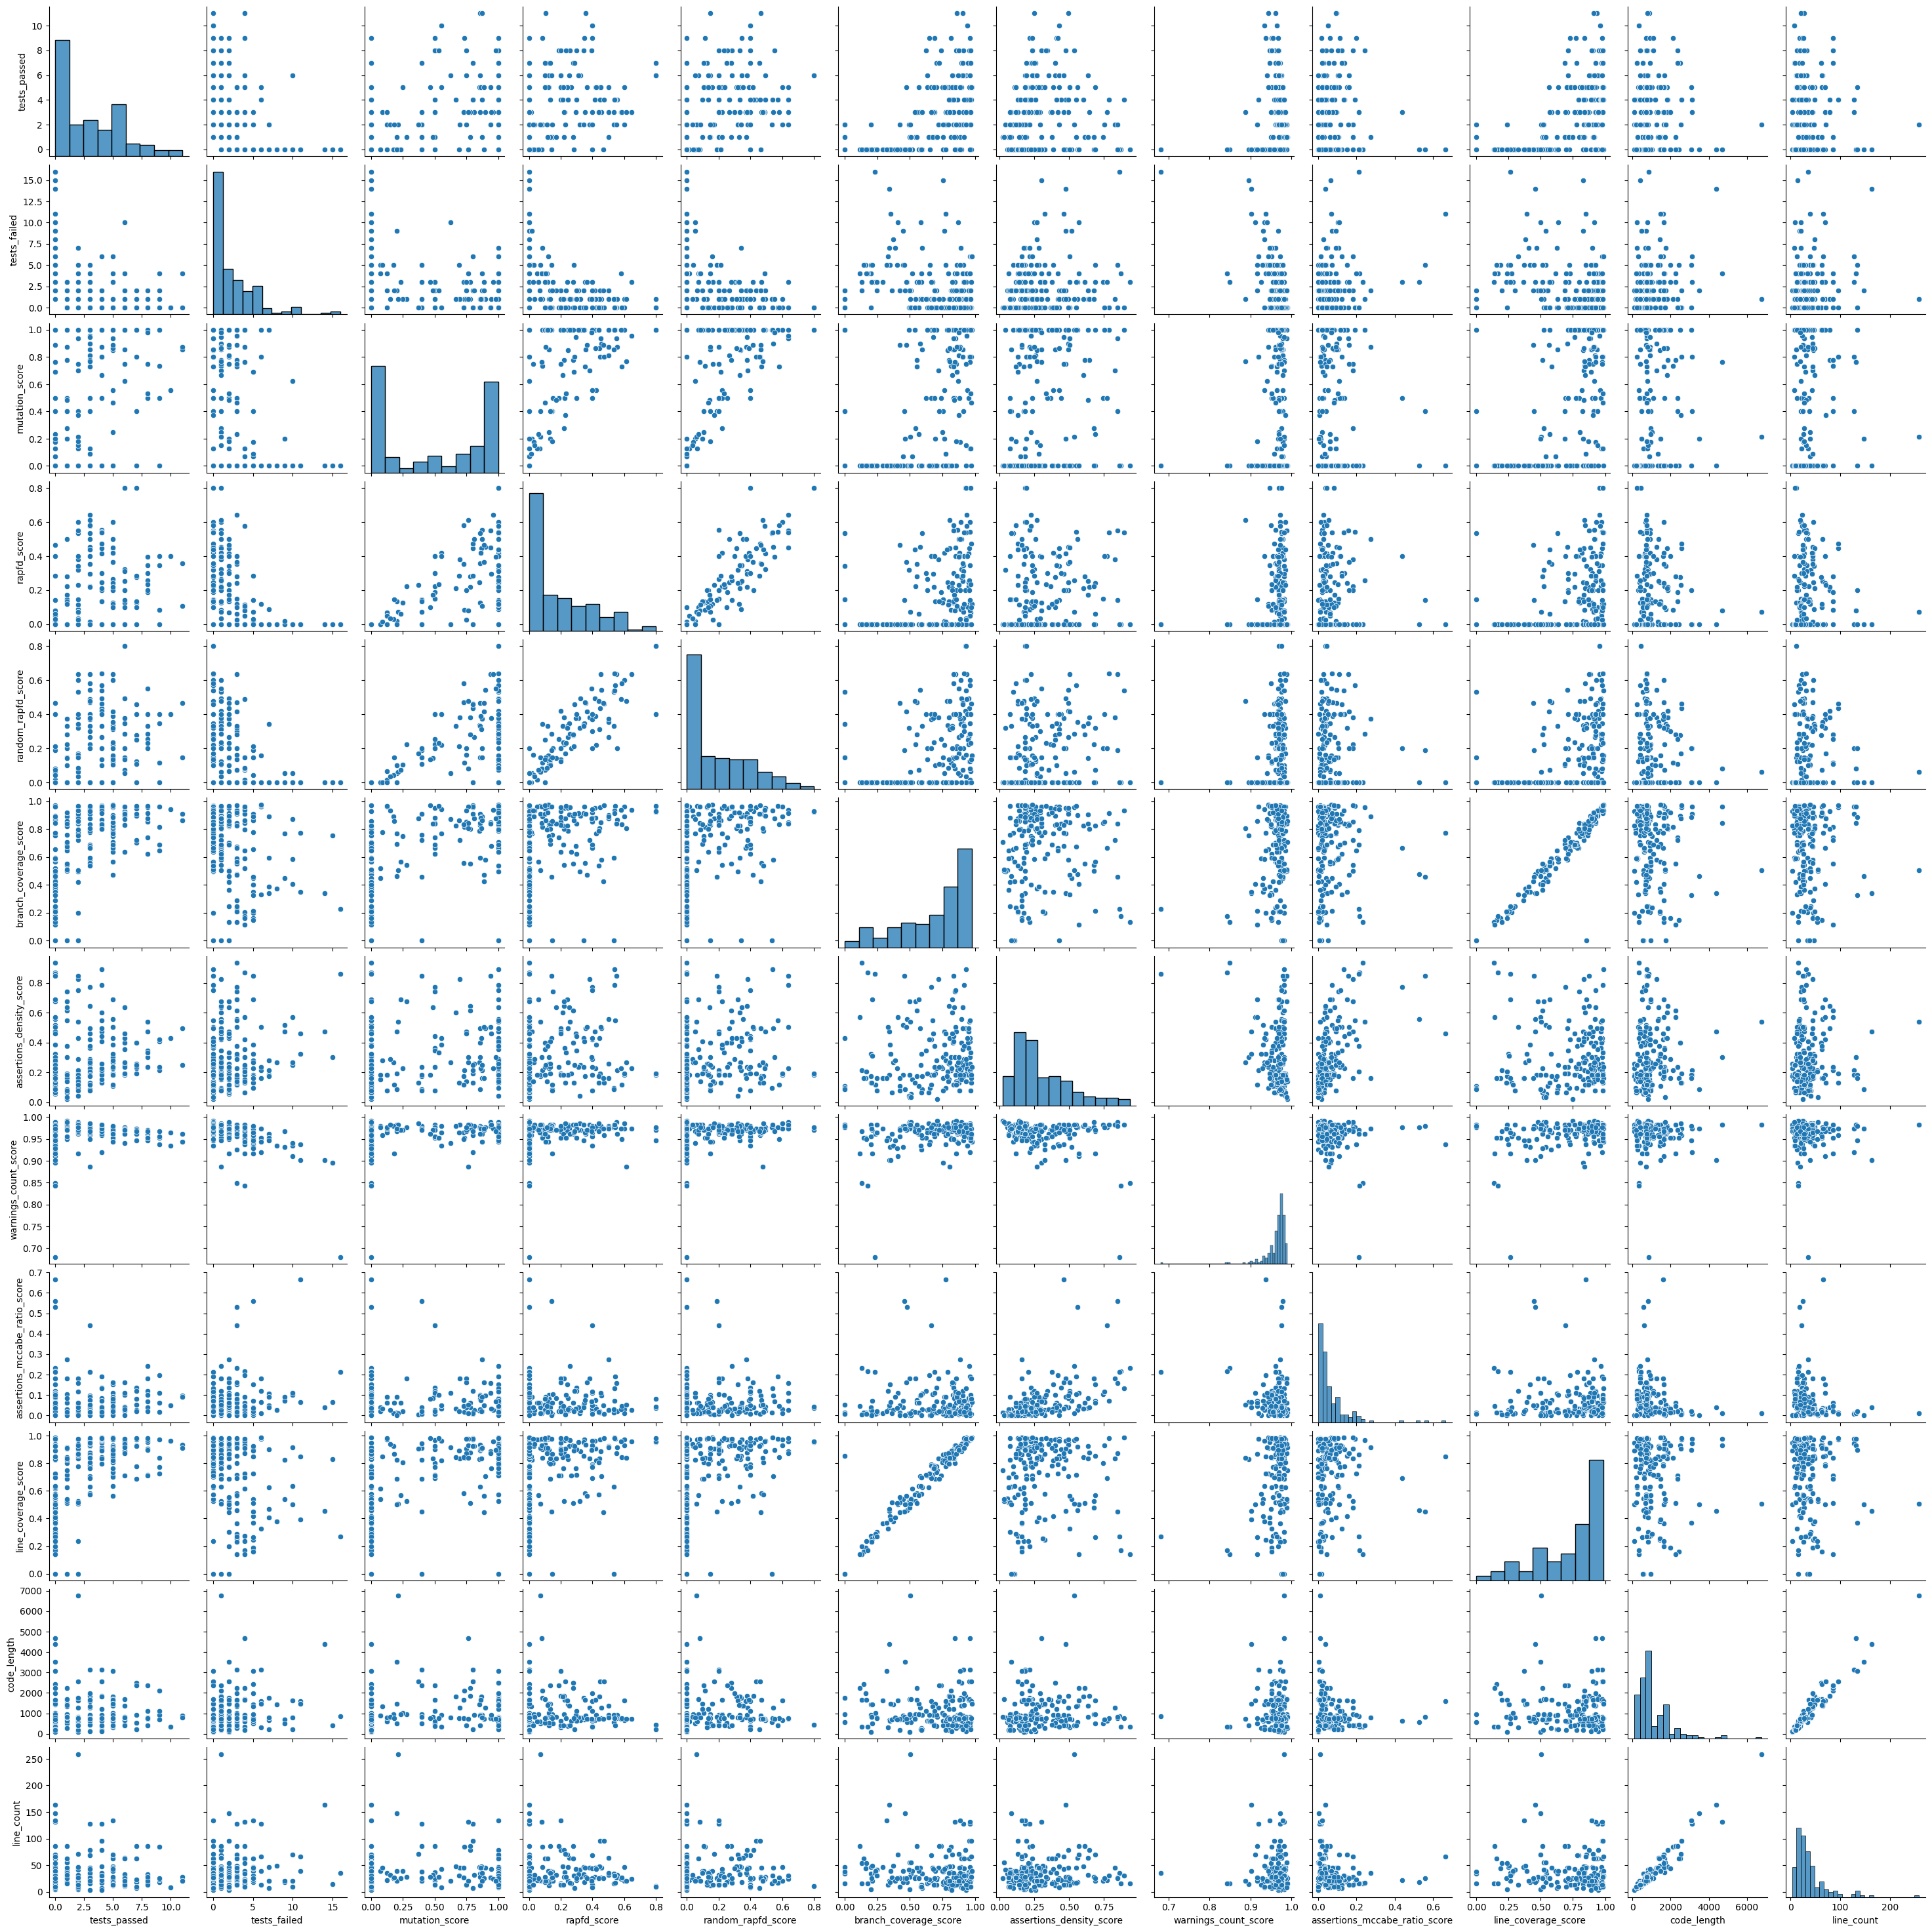

In [16]:
# Create a pairplot
sns.pairplot(df_clean)

# Show the plot
plt.show()

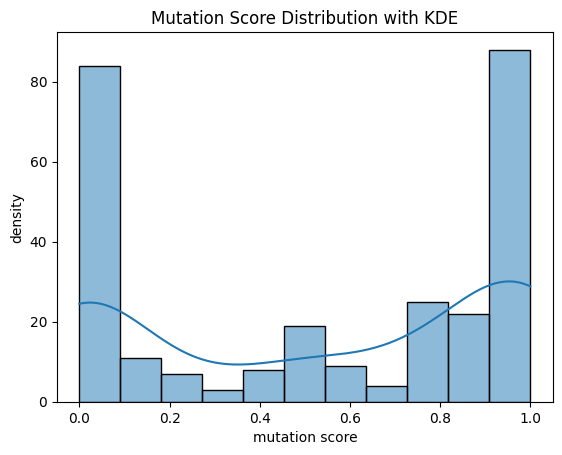

In [17]:
sns.histplot(df['mutation_score'], bins=11, kde=True)
plt.title('Mutation Score Distribution with KDE')
plt.xlabel('mutation score')
plt.ylabel('density')
plt.show()

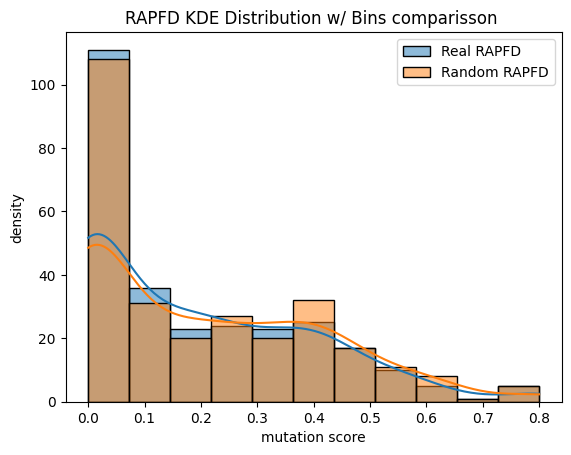

In [18]:
sns.histplot(df['rapfd_score'], bins=11, label="Real RAPFD", kde=True)
sns.histplot(df['random_rapfd_score'], label="Random RAPFD", bins=11, kde=True)


plt.title('RAPFD KDE Distribution w/ Bins comparisson ')
plt.xlabel('mutation score')
plt.ylabel('density')
plt.legend()

plt.show()

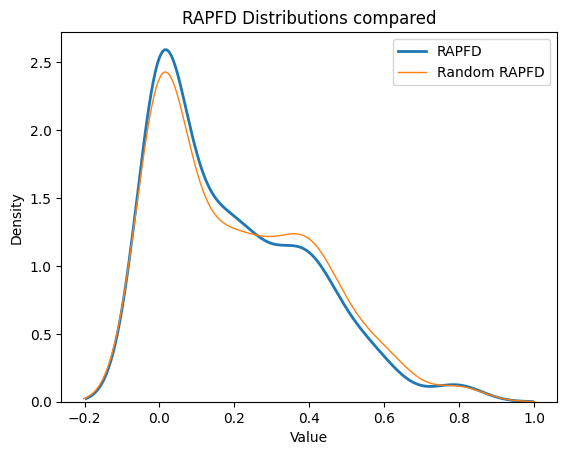

In [19]:
sns.kdeplot(df['rapfd_score'], label='RAPFD', linewidth=2)
sns.kdeplot(df['random_rapfd_score'], label='Random RAPFD', linewidth=1)

plt.title('RAPFD Distributions compared')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

# Initial look at the data

Let's look initially on the pairwise scatter plot of all data columns.
Although this will be too large for detailed analysis, issues can be spotted 

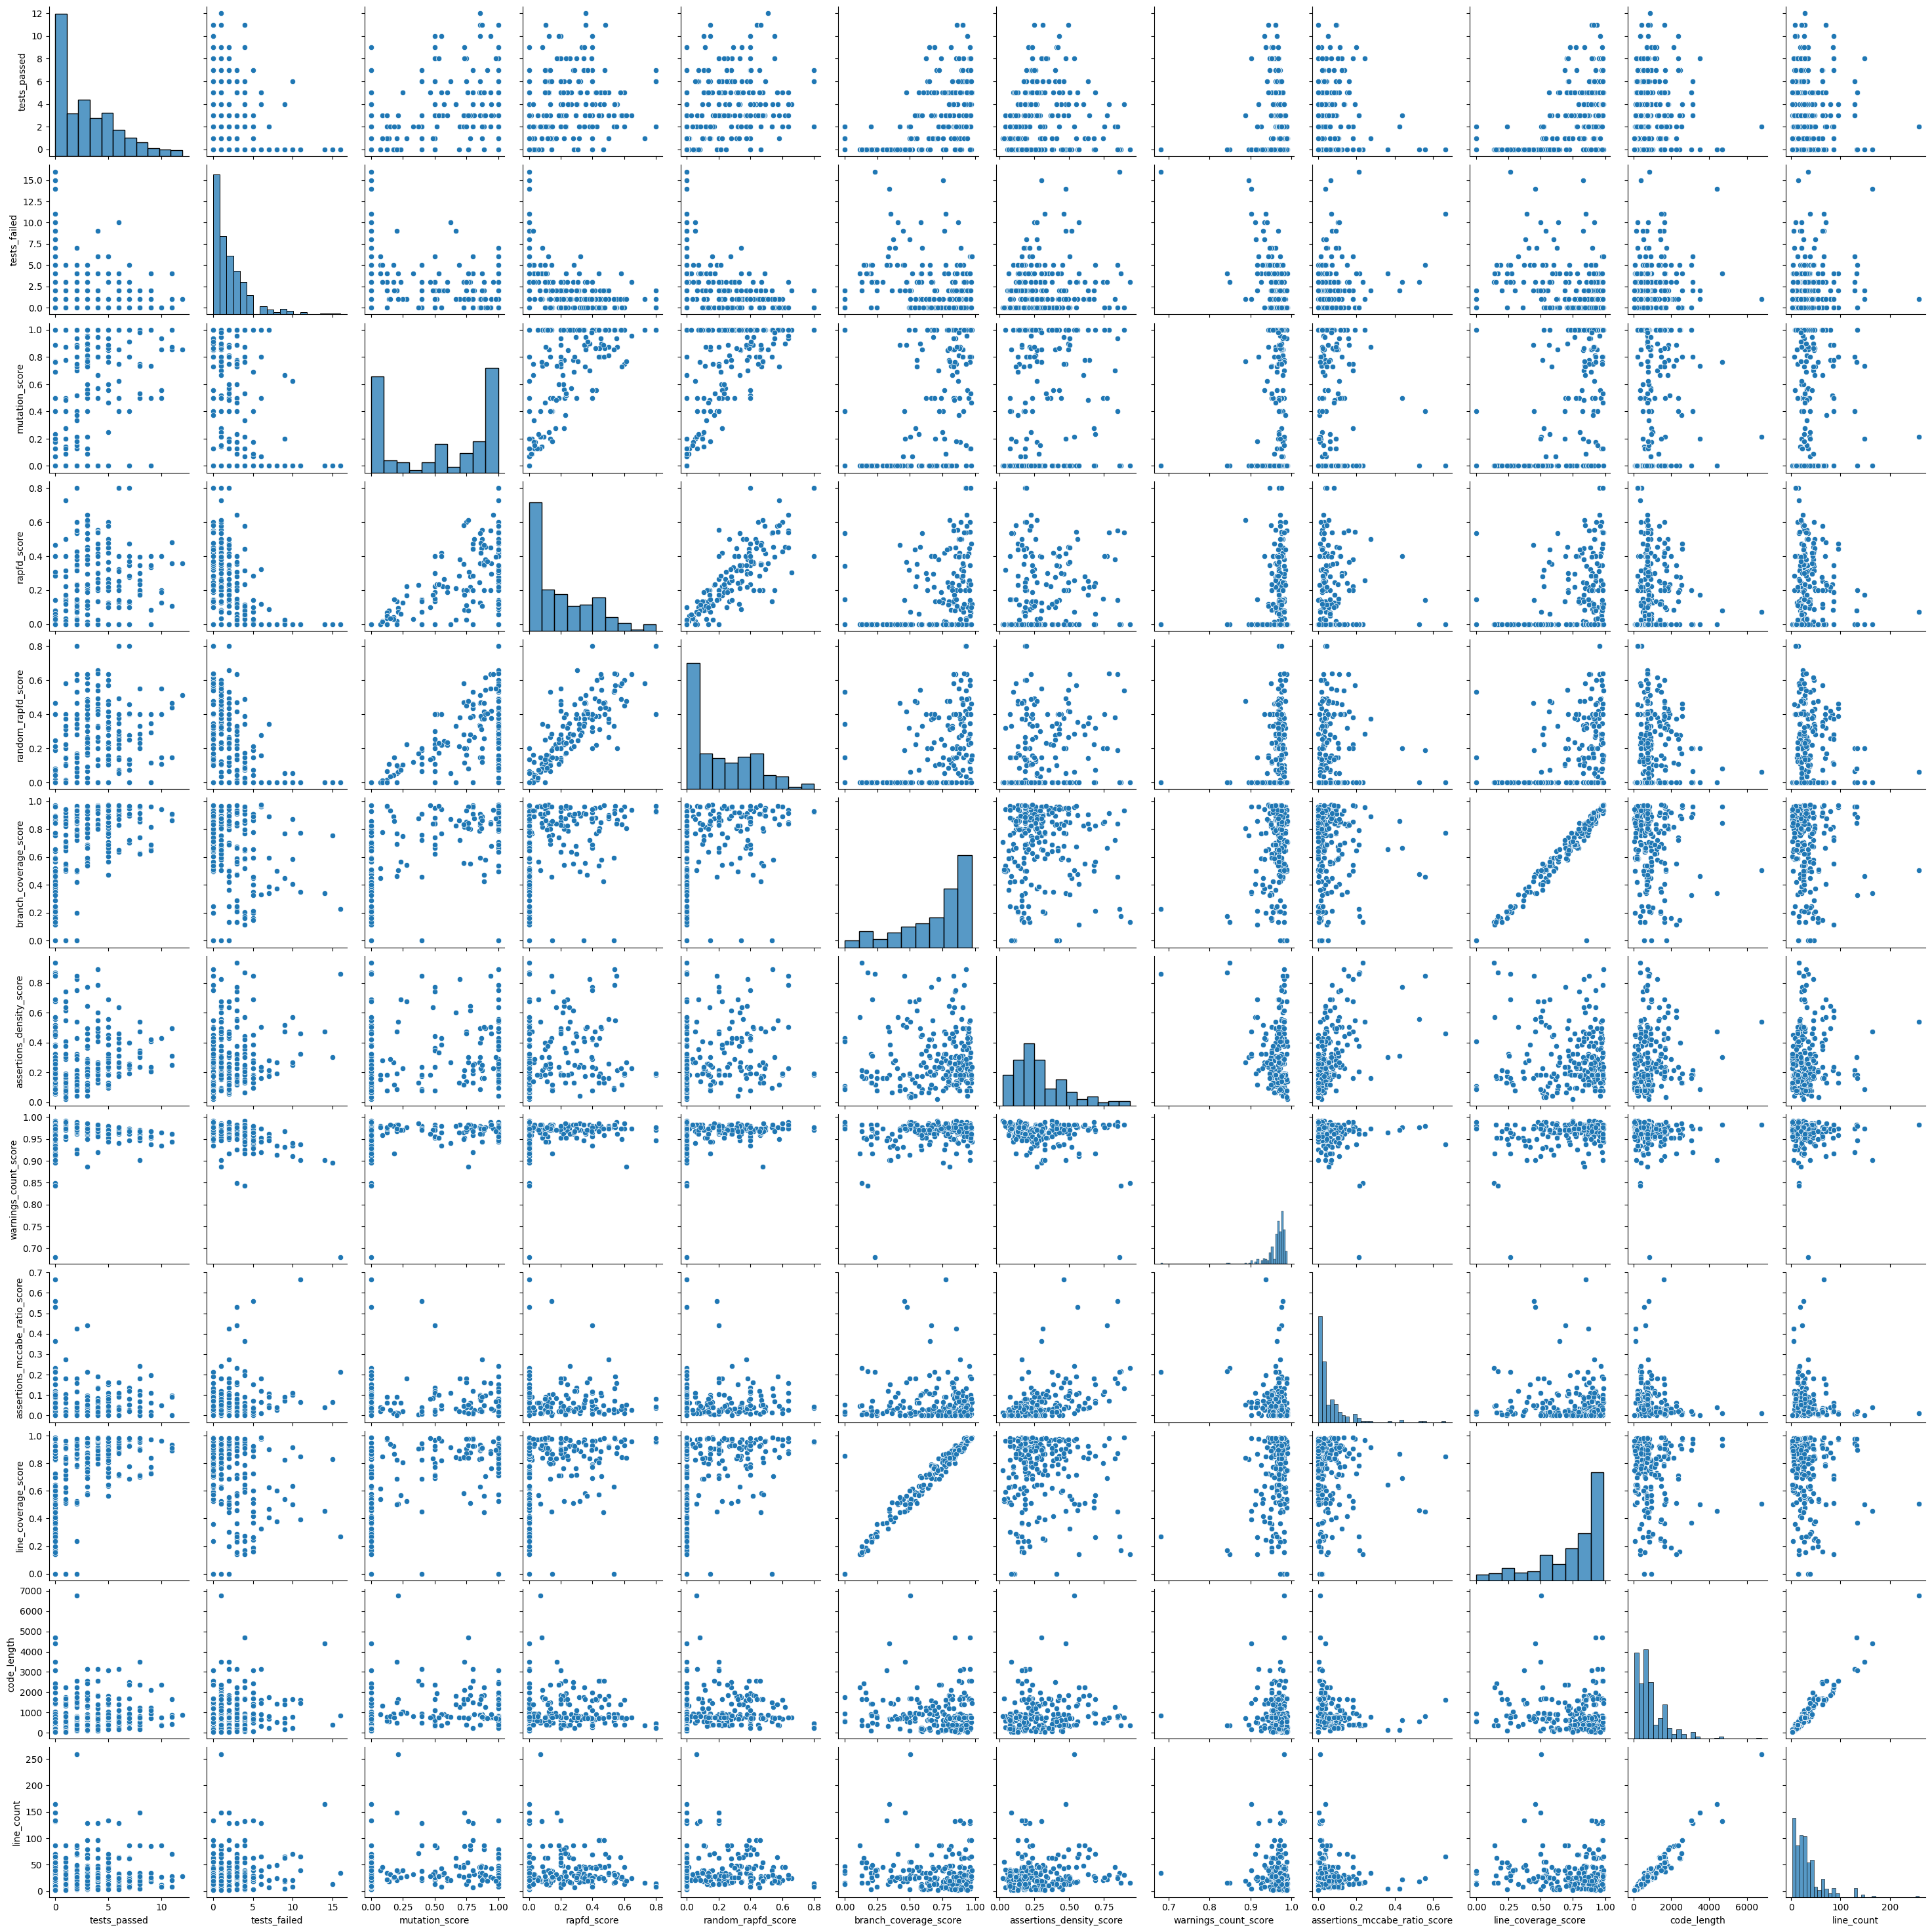

In [20]:
# Create a pairplot
sns.pairplot(df)

# Show the plot
plt.show()

Let's focus on the first three rows (our computed MT metrics). There seems to be some hidden trends behind those overcrowded lines at the top and bottom of the graphs
This indicates that the data needs to be scaled

In [21]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled, columns=df.columns)

In [22]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')  # works with positive or negative values
scaled_2 = pt.fit_transform(df)
scaled_2_df = pd.DataFrame(scaled, columns=df.columns)

In [23]:
df.head()

tests_passed  tests_failed  mutation_score  rapfd_score  \
0             0            14             0.0     0.000000   
1             0             7             0.0     0.000000   
2             5             0             1.0     0.600000   
3             0             2             0.0     0.000000   
4             3             3             0.5     0.133333   

   random_rapfd_score  branch_coverage_score  assertions_density_score  \
0            0.000000                 0.3404                  0.473118   
1            0.000000                 0.3409                  0.182796   
2            0.600000                 0.8923                  0.182796   
3            0.000000                 0.0000                  0.107527   
4            0.066667                    NaN                       NaN   

   warnings_count_score  assertions_mccabe_ratio_score  line_coverage_score  \
0              0.902077                       0.038485               0.4559   
1              0.949555                       0.048485               0.4677   
2              0.973294                       0.030303               0.9302   
3              0.982196                       0.010000               0.0000   
4                   NaN                            NaN                  NaN   

   code_length  line_count  
0       4402.0       164.0  
1        677.0        21.0  
2        677.0        21.0  
3        573.0        34.0  
4        573.0        34.0

In [24]:
scaled_2_df

tests_passed  tests_failed  mutation_score  rapfd_score  \
0        0.000000        0.8750        0.000000     0.000000   
1        0.000000        0.4375        0.000000     0.000000   
2        0.416667        0.0000        1.000000     0.750000   
3        0.000000        0.1250        0.000000     0.000000   
4        0.250000        0.1875        0.500000     0.166667   
..            ...           ...             ...          ...   
345      0.583333        0.0000        0.914894     0.462766   
346      0.250000        0.0625        0.765957     0.765957   
347      0.666667        0.1250        0.533333     0.291667   
348      0.250000        0.2500        0.533333     0.291667   
349      0.416667        0.1875        0.466667     0.125000   

     random_rapfd_score  branch_coverage_score  assertions_density_score  \
0              0.000000               0.348521                  0.494118   
1              0.000000               0.349032                  0.176471   
2              0.750000               0.913587                  0.176471   
3              0.000000               0.000000                  0.094118   
4              0.083333                    NaN                       NaN   
..                  ...                    ...                       ...   
345            0.505319                    NaN                       NaN   
346            0.595745               0.826968                  0.270588   
347            0.291667               0.988533                  0.341176   
348            0.218750                    NaN                       NaN   
349            0.166667               0.994983                  0.176471   

     warnings_count_score  assertions_mccabe_ratio_score  line_coverage_score  \
0                0.714286                       0.057727             0.461998   
1                0.866667                       0.072727             0.473956   
2                0.942857                       0.045455             0.942643   
3                0.971429                       0.015000             0.000000   
4                     NaN                            NaN                  NaN   
..                    ...                            ...                  ...   
345                   NaN                            NaN                  NaN   
346              0.666667                       0.079545             0.852148   
347              0.876190                       0.151364             0.993109   
348                   NaN                            NaN                  NaN   
349              0.904762                       0.121364             0.997264   

     code_length  line_count  
0       0.649442    0.630350  
1       0.094713    0.073930  
2       0.094713    0.073930  
3       0.079226    0.124514  
4       0.079226    0.124514  
..           ...         ...  
345     0.102159    0.070039  
346     0.102159    0.070039  
347     0.106180    0.101167  
348     0.106180    0.101167  
349     0.106180    0.101167  

[350 rows x 12 columns]

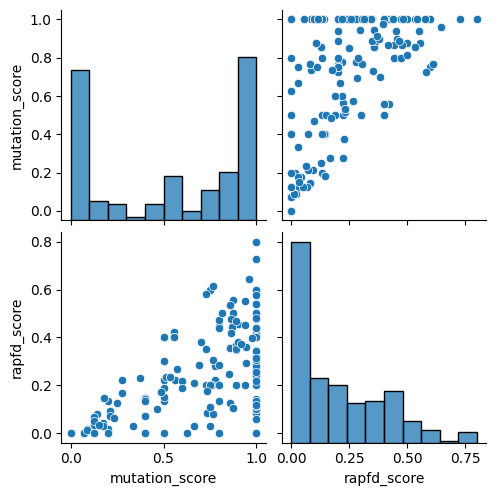

In [25]:
sns.pairplot(df, vars=['mutation_score', 'rapfd_score'])

plt.show()

<Axes: >

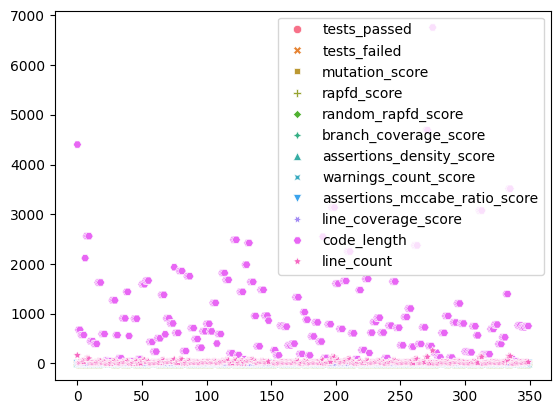

In [26]:
sns.scatterplot(data=df)

<Axes: xlabel='per_test_score', ylabel='Density'>

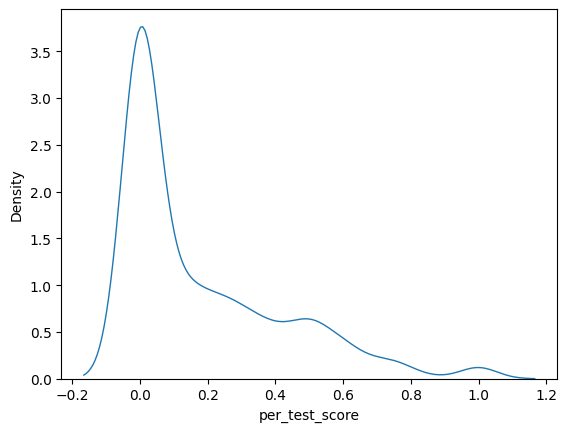

In [27]:
sns.kdeplot(per_test['per_test_score'], label='Random RAPFD', linewidth=1)

<Axes: xlabel='per_test_score', ylabel='Count'>

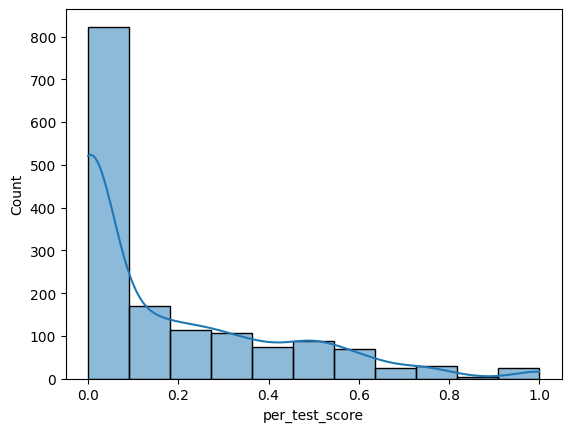

In [28]:
sns.histplot(per_test['per_test_score'], label="Random RAPFD", bins=11, kde=True)


<Axes: xlabel='per_test_score', ylabel='Density'>

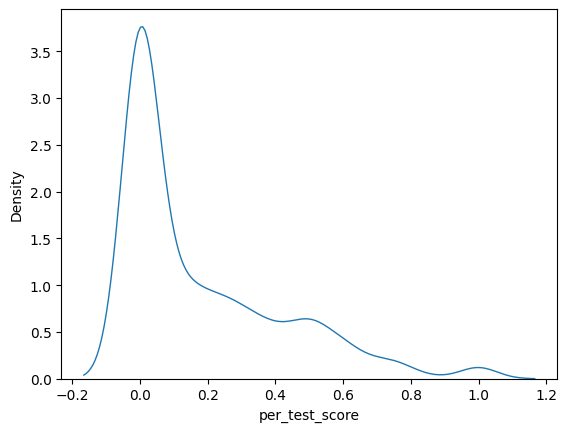

In [29]:
sns.kdeplot(per_test['per_test_score'], label='Random RAPFD', linewidth=1)

In [30]:
overall_df.groupby("llm_model")["mutation_score"].mean()

/tmp/ipykernel_361380/658637825.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  overall_df.groupby("llm_model")["mutation_score"].mean()


llm_model
deepseek_coder       0.532447
gemini_1_5_pro       0.651704
gpt_4o_2024_08_06    0.446060
Name: mutation_score, dtype: float64

In [31]:
overall_df.groupby("llm_model")["rapfd_score"].mean()

/tmp/ipykernel_361380/4043481832.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  overall_df.groupby("llm_model")["rapfd_score"].mean()


llm_model
deepseek_coder       0.179611
gemini_1_5_pro       0.224281
gpt_4o_2024_08_06    0.178060
Name: rapfd_score, dtype: float64

In [32]:
overall_df.groupby("llm_model")["random_rapfd_score"].mean()

/tmp/ipykernel_361380/2685591406.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  overall_df.groupby("llm_model")["random_rapfd_score"].mean()


llm_model
deepseek_coder       0.188410
gemini_1_5_pro       0.255541
gpt_4o_2024_08_06    0.181515
Name: random_rapfd_score, dtype: float64

In [33]:
# sns.pairplot(overall_df, vars= hue="llm_model")

# plt.show()

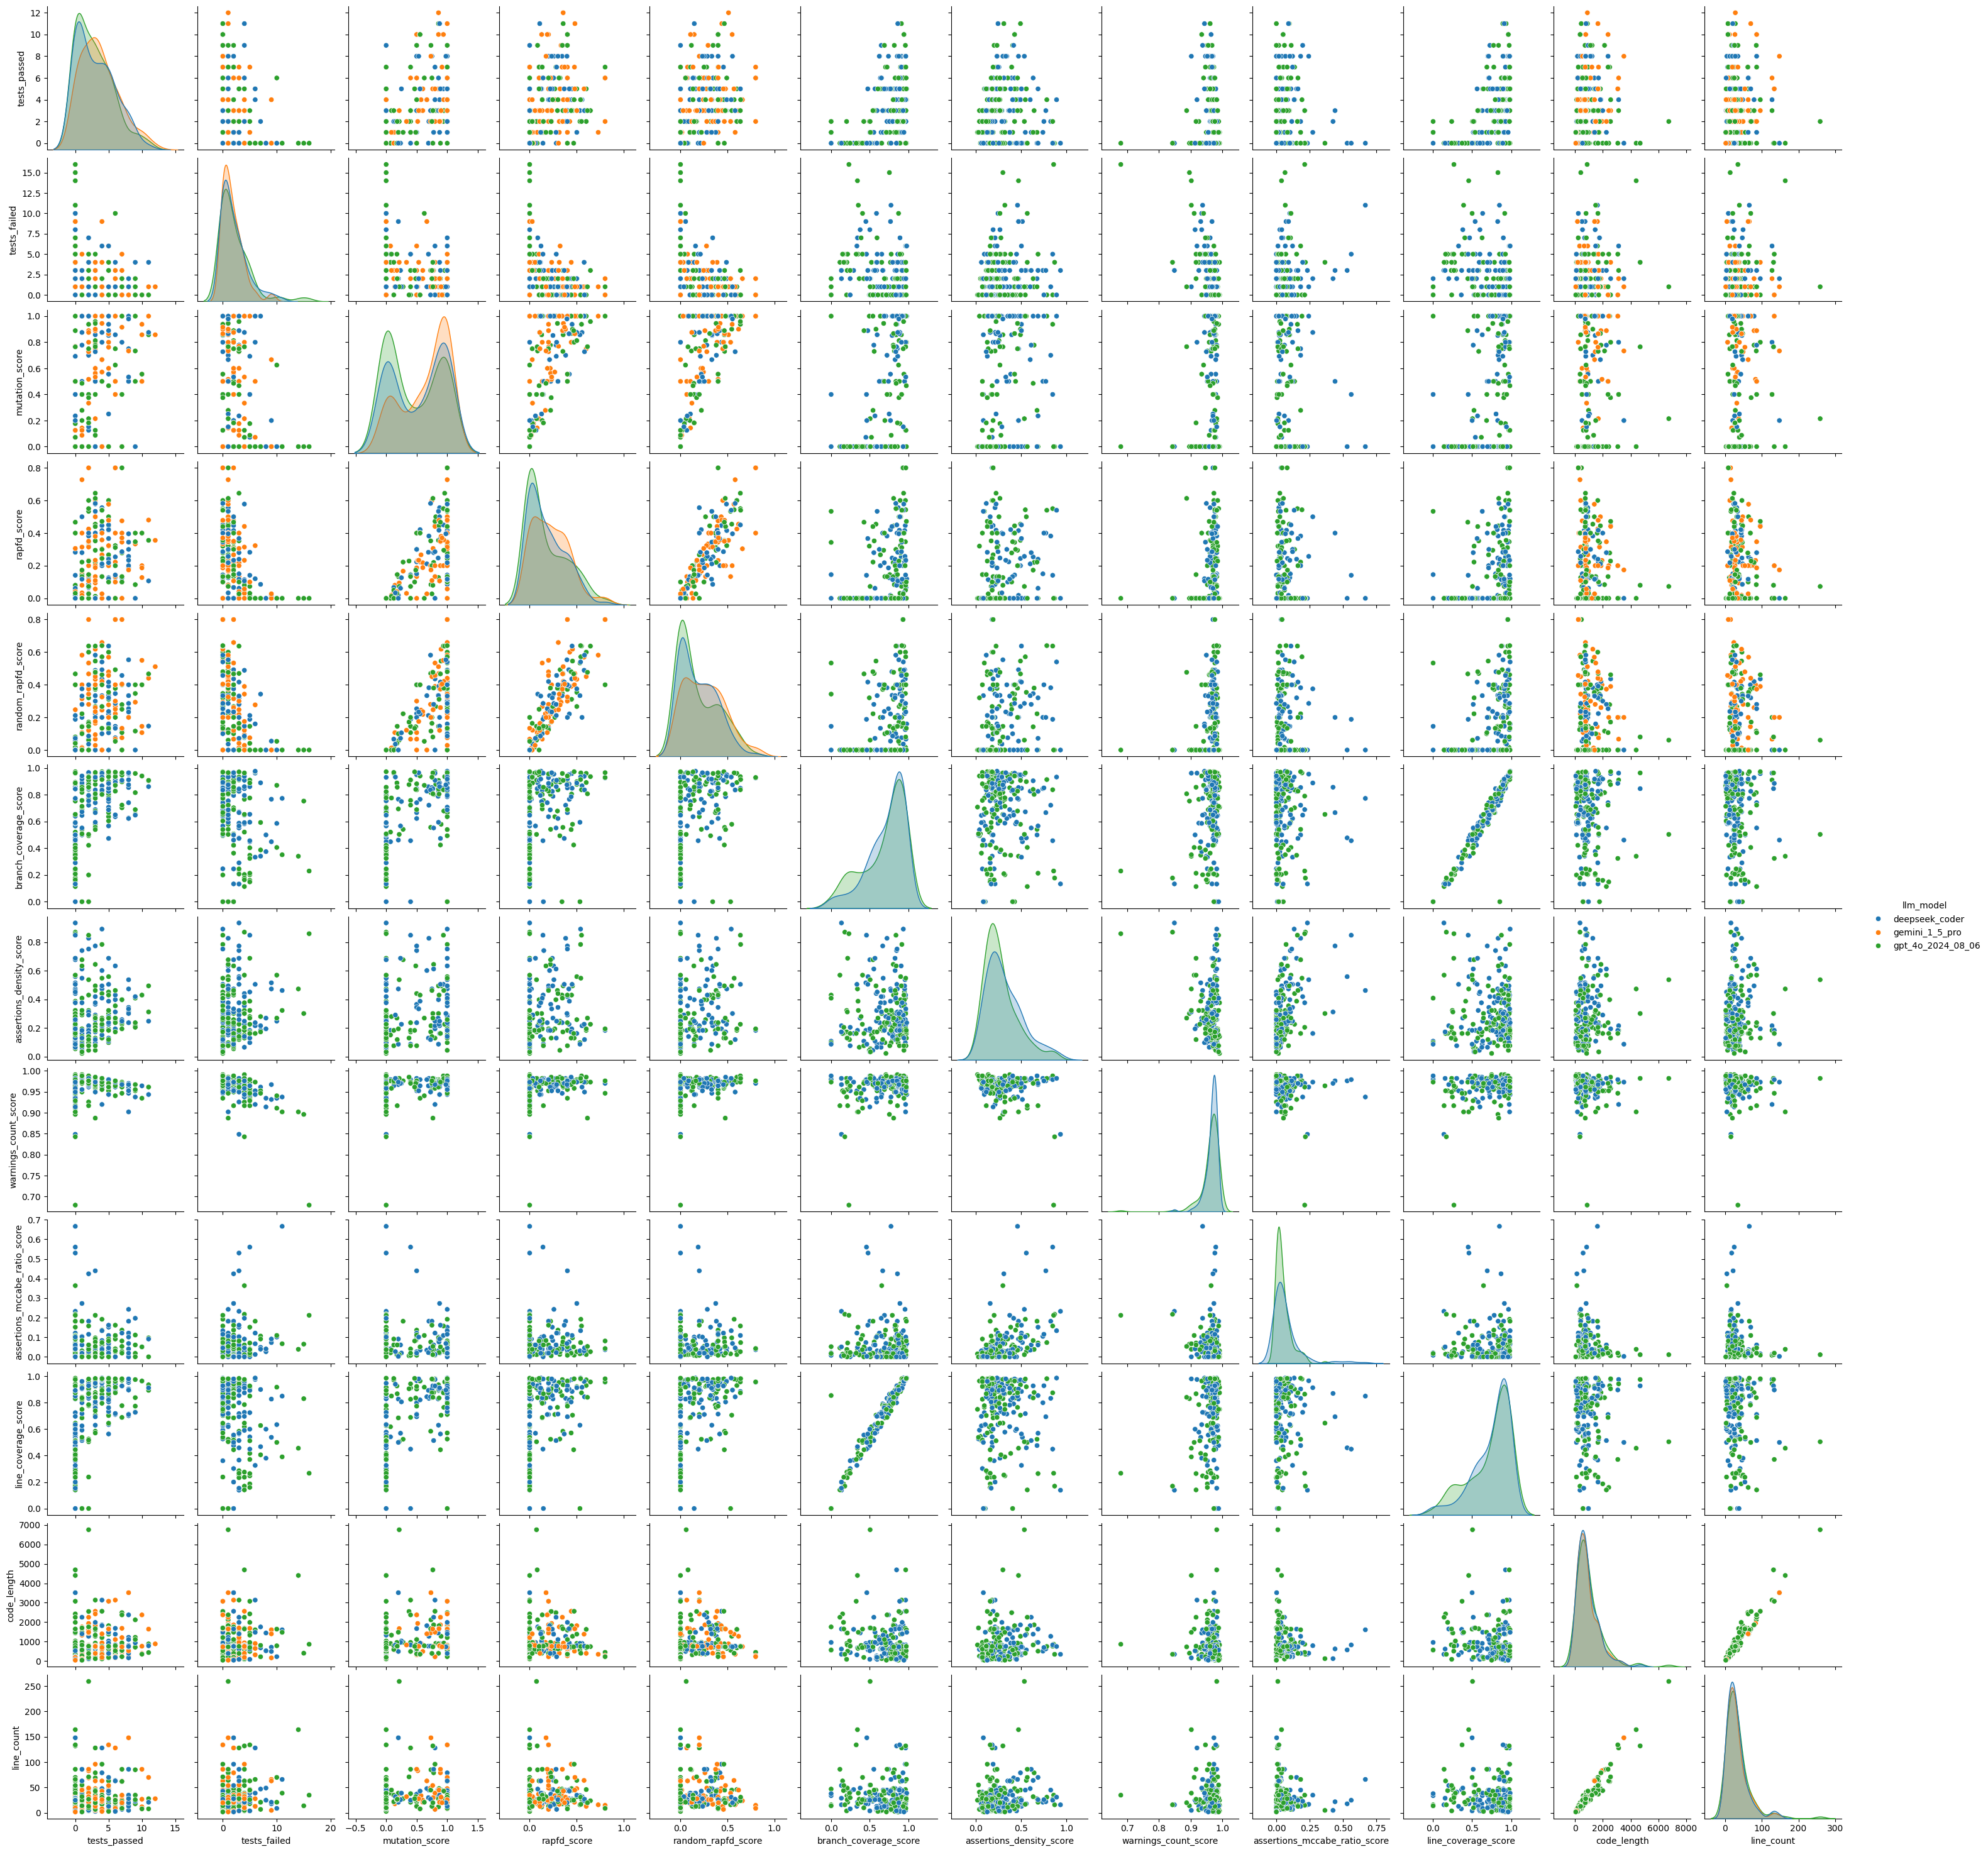

In [34]:
sns.pairplot(overall_df, vars=selected_columns, hue="llm_model")

plt.show()

/tmp/ipykernel_361380/1217251206.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for model, group in overall_df.groupby('llm_model'):


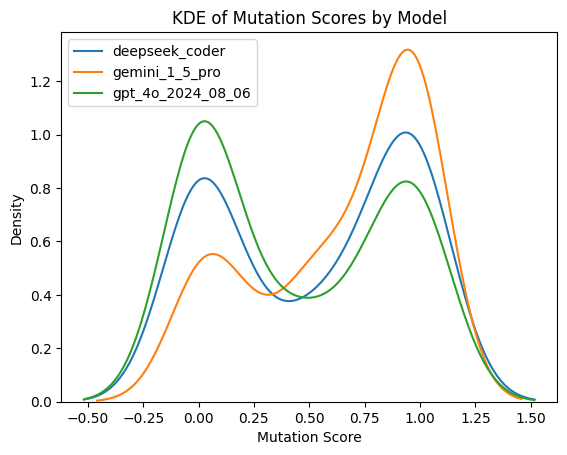

In [35]:
for model, group in overall_df.groupby('llm_model'):
    sns.kdeplot(group['mutation_score'], label=model)

plt.xlabel('Mutation Score')
plt.ylabel('Density')
plt.title('KDE of Mutation Scores by Model')
plt.legend()
plt.show()

/tmp/ipykernel_361380/775691054.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for (model, group),color in zip(overall_df.groupby('llm_model'),colors):


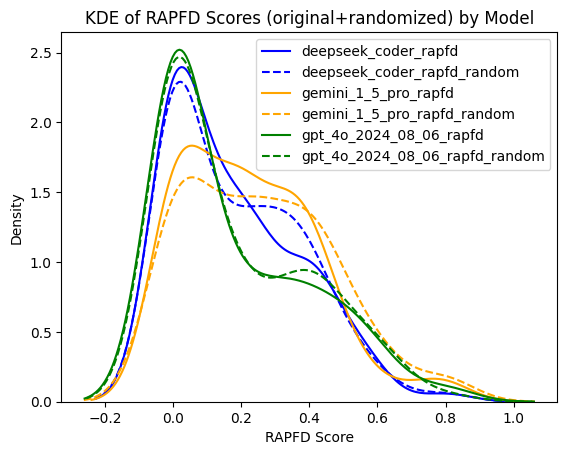

In [36]:
colors = ["blue", "orange", "green"]
for (model, group),color in zip(overall_df.groupby('llm_model'),colors):
    sns.kdeplot(group['rapfd_score'], label=model+"_rapfd", color=color)
    sns.kdeplot(group['random_rapfd_score'], label=model+"_rapfd_random", linestyle="--", color=color)


plt.xlabel('RAPFD Score')
plt.ylabel('Density')
plt.title('KDE of RAPFD Scores (original+randomized) by Model')
plt.legend()

plt.savefig("image/rapfd_comparisson_boxplot", bbox_inches='tight')

plt.show()

/tmp/ipykernel_361380/4279162735.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  overall_df.groupby('llm_model').agg({"timeout":"sum","incompetent":"sum","survived":"sum","killed":"sum"}).sort_values(by='killed', ascending=False).plot.bar()


<Axes: xlabel='llm_model'>

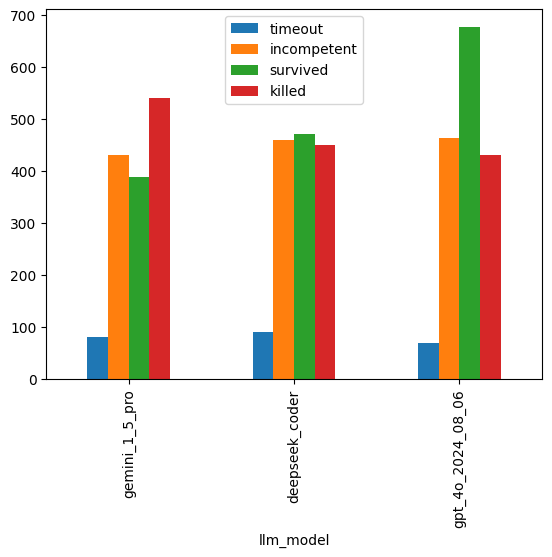

In [37]:
overall_df.groupby('llm_model').agg({"timeout":"sum","incompetent":"sum","survived":"sum","killed":"sum"}).sort_values(by='killed', ascending=False).plot.bar()
# df.groupby('A').agg({'B': ['min', 'max'], 'C': 'sum'})


    # .reset_index(name='count').pivot_table(index='llm_model', columns='killed', values='count').plot(kind='bar', stacked=True,)


/tmp/ipykernel_361380/1502803410.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  overall_df.groupby('llm_model').agg({"all_mutants":"sum"}).plot.bar()


<Axes: xlabel='llm_model'>

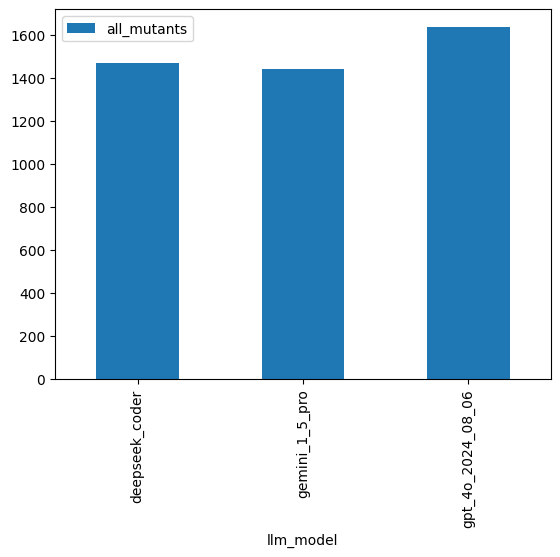

In [38]:
overall_df.groupby('llm_model').agg({"all_mutants":"sum"}).plot.bar()


/tmp/ipykernel_361380/1097673756.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  overall_df.groupby('llm_model').agg({"timeout":"sum","incompetent":"sum","killed":"sum", "survived":"sum", "all_mutants":"sum"}).sort_values(by='all_mutants', ascending=False).drop(columns='all_mutants').plot(kind="bar", stacked=True)


<Axes: xlabel='llm_model'>

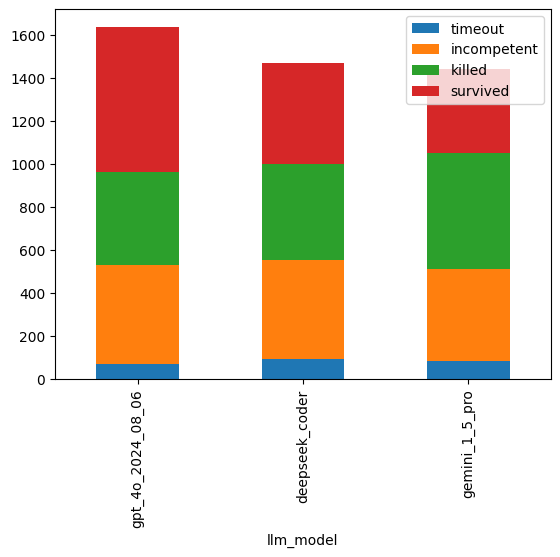

In [39]:
overall_df.groupby('llm_model').agg({"timeout":"sum","incompetent":"sum","killed":"sum", "survived":"sum", "all_mutants":"sum"}).sort_values(by='all_mutants', ascending=False).drop(columns='all_mutants').plot(kind="bar", stacked=True)


/tmp/ipykernel_361380/3160205794.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  overall_df.groupby('llm_model')
/tmp/ipykernel_361380/3160205794.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  overall_df.groupby('llm_model').agg({"timeout":"sum","incompetent":"sum","killed":"sum", "survived":"sum", "all_mutants":"sum"}).sort_values(by='all_mutants', ascending=False).drop(columns='all_mutants').plot(kind="bar", ax=axes[0], stacked=True, rot=30, color=color_list).legend().remove()


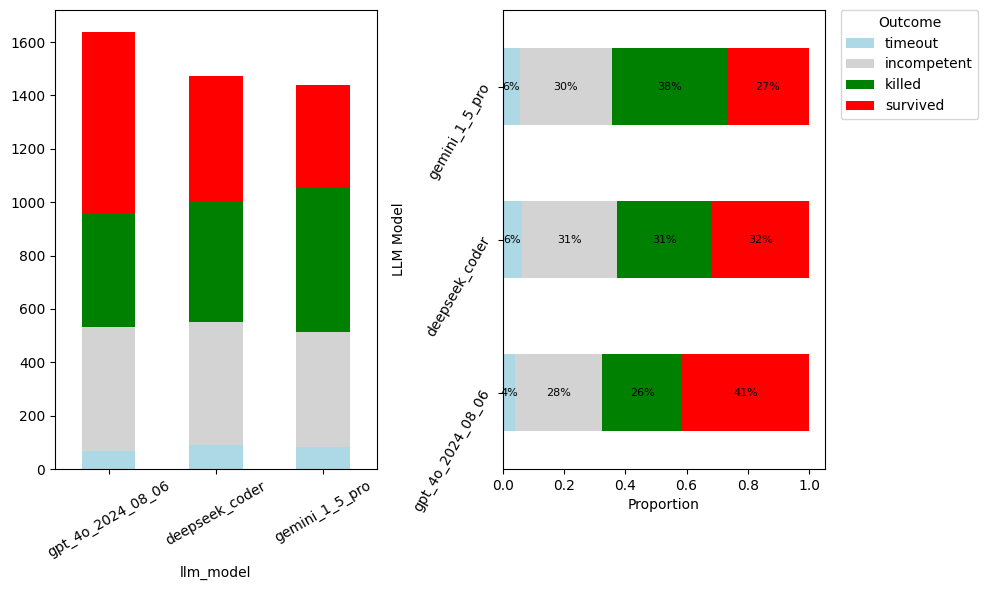

In [40]:
import matplotlib.pyplot as plt

# Step 1: Aggregate the data
counts_df = (
    overall_df.groupby('llm_model')
    .agg({"timeout":"sum", "incompetent":"sum", "killed":"sum", "survived":"sum", "all_mutants":"sum"})
    .sort_values(by='all_mutants', ascending=False)
)

# Step 2: Drop total column and calculate proportions (ratios)
ratios_df = counts_df.drop(columns='all_mutants')
ratios_normalized = ratios_df.div(ratios_df.sum(axis=1), axis=0)

# Define custom colors
custom_colors = {
    "killed": "green",         # forced green
    "survived": "red",         # forced red
    "timeout": "lightblue",    # light blue
    "incompetent": "lightgrey" # light grey
}

# Create color list in column order
color_list = [
    custom_colors[col] if custom_colors[col] is not None else None
    for col in ratios_normalized.columns
]

fig, axes = plt.subplots(ncols=2, figsize=(10, 4))  # You can adjust figsize

overall_df.groupby('llm_model').agg({"timeout":"sum","incompetent":"sum","killed":"sum", "survived":"sum", "all_mutants":"sum"}).sort_values(by='all_mutants', ascending=False).drop(columns='all_mutants').plot(kind="bar", ax=axes[0], stacked=True, rot=30, color=color_list).legend().remove()



# Step 3: Plot horizontal stacked bar
ax = ratios_normalized.plot(kind='barh', ax=axes[1], rot=60, stacked=True, figsize=(10, 6), color=color_list)
ax.legend(
    title="Outcome",
    bbox_to_anchor=(1.05, 1),   # X > 1 pushes it outside the axis box
    loc='upper left',
    borderaxespad=0.
)

# Optional: add percentages inside bars
for i, row in enumerate(ratios_normalized.values):
    cum_width = 0
    for j, val in enumerate(row):
        if val > 0.03:  # skip tiny segments
            ax.text(cum_width + val / 2, i, f"{val:.0%}", ha='center', va='center', fontsize=8)
        cum_width += val

# Labels and layout
plt.xlabel("Proportion")
plt.ylabel("LLM Model")
plt.tight_layout()

plt.savefig("image/mutants_stats", bbox_inches='tight')

plt.show()


In [41]:
overall_df

test_module_name  \
0                 test_gpt_4o_2024_08_06_four_is_magic   
1                         test_deepseek_coder_fractran   
2                      test_gpt_4o_2024_08_06_fractran   
3                    test_deepseek_coder_fusc_sequence   
4                test_gemini_1_5_pro_002_fusc_sequence   
..                                                 ...   
345  test_gemini_1_5_pro_002_find_the_intersection_...   
346  test_gpt_4o_2024_08_06_find_the_intersection_o...   
347                        test_deepseek_coder_fivenum   
348                    test_gemini_1_5_pro_002_fivenum   
349                     test_gpt_4o_2024_08_06_fivenum   

                               target_file  mutation_score  time_elapsed  \
0                         four_is_magic.py        0.000000      6.134086   
1                              fractran.py        0.000000      0.189423   
2                              fractran.py        1.000000      0.170111   
3                         fusc_sequence.py        0.000000      3.269192   
4                         fusc_sequence.py        0.500000      1.645551   
..                                     ...             ...           ...   
345  find_the_intersection_of_two_lines.py        0.914894      1.253059   
346  find_the_intersection_of_two_lines.py        0.765957      1.724014   
347                             fivenum.py        0.533333      0.804018   
348                             fivenum.py        0.533333      0.949056   
349                             fivenum.py        0.466667      0.944354   

     all_mutants  killed  survived  incompetent  timeout  rapfd_score  ...  \
0             78       0        74            4        0     0.000000  ...   
1              8       0         6            2        0     0.000000  ...   
2              8       6         0            2        0     0.600000  ...   
3              6       0         2            4        0     0.000000  ...   
4              6       1         1            4        0     0.133333  ...   
..           ...     ...       ...          ...      ...          ...  ...   
345           47      43         4            0        0     0.370213  ...   
346           47      36        11            0        0     0.612766  ...   
347           24       8         7            9        0     0.233333  ...   
348           24       8         7            9        0     0.233333  ...   
349           24       7         8            9        0     0.100000  ...   

     timeout_occurred  Unnamed: 0  \
0               False     53258.0   
1               False     52466.0   
2               False     52466.0   
3               False     52301.0   
4                 NaN     52301.0   
..                ...         ...   
345               NaN     54265.0   
346             False     54265.0   
347             False     53922.0   
348               NaN     53922.0   
349             False     53922.0   

                                              task_url  \
0            http://rosettacode.org/wiki/Four_is_magic   
1                 http://rosettacode.org/wiki/Fractran   
2                 http://rosettacode.org/wiki/Fractran   
3            http://rosettacode.org/wiki/Fusc_sequence   
4            http://rosettacode.org/wiki/Fusc_sequence   
..                                                 ...   
345  http://rosettacode.org/wiki/Find_the_intersect...   
346  http://rosettacode.org/wiki/Find_the_intersect...   
347                http://rosettacode.org/wiki/Fivenum   
348                http://rosettacode.org/wiki/Fivenum   
349                http://rosettacode.org/wiki/Fivenum   

                                      task_description language_url  \
0    Task\n\nWrite a subroutine, function, whatever...      #Python   
1    FRACTRAN is a Turing-complete esoteric program...      #Python   
2    FRACTRAN is a Turing-complete esoteric program...      #Python   
3    \n\nDefinitions\n\nThe   fusc   integer sequen...      #Pyth

/tmp/ipykernel_361380/3425208688.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats_df = overall_df.groupby('llm_model').agg({"tests_passed":"sum","tests_failed":"sum"})


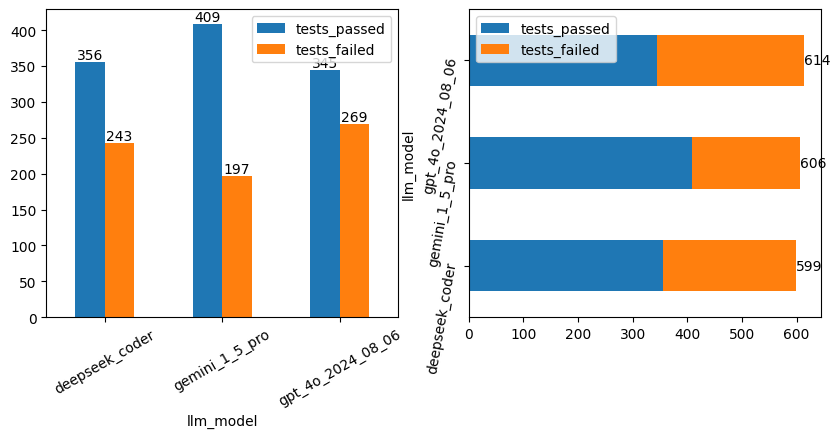

In [42]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 4))  # You can adjust figsize

stats_df = overall_df.groupby('llm_model').agg({"tests_passed":"sum","tests_failed":"sum"})
ax = stats_df.plot(kind='bar', ax=axes[0], rot=30)

for container in ax.containers:
    ax.bar_label(container)

ax = stats_df.plot(kind='barh', ax=axes[1], stacked=True, rot=80)
ax.bar_label(ax.containers[1])
plt.savefig("image/test_passed_failed_overal_per_llm", bbox_inches='tight')

<Axes: xlabel='mutation_score', ylabel='llm_model'>

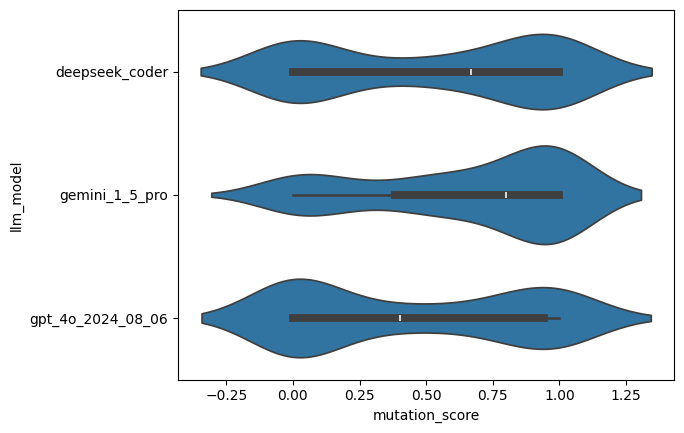

In [43]:
# .agg({"tests_passed":"sum","tests_failed":"sum"}).sort_values(by='tests_passed', ascending=False).plot(kind='bar', stacked=True,)
sns.violinplot(data=overall_df, x="mutation_score", y="llm_model")

/tmp/ipykernel_361380/172640459.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medians = overall_df.groupby('llm_model')['mutation_score'].median()


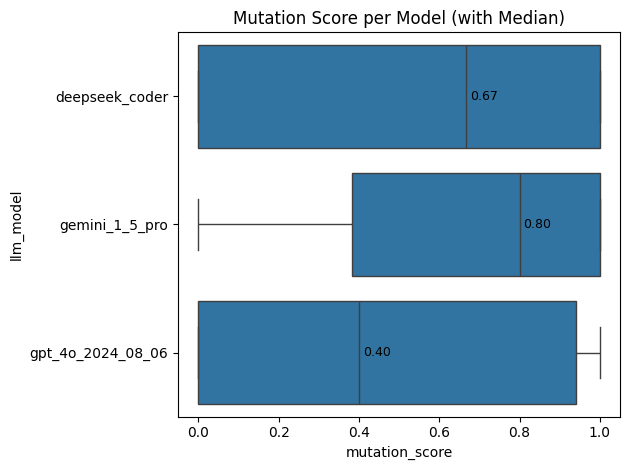

In [44]:
# sns.boxplot(data=overall_df, x="mutation_score", y="llm_model")
# plt.savefig("image/mutation_score_per_llm_boxplot", bbox_inches='tight')

# Create boxplot
ax = sns.boxplot(data=overall_df, x="mutation_score", y="llm_model")

# Compute medians
medians = overall_df.groupby('llm_model')['mutation_score'].median()

# Annotate each box with the median value
for i, (model, median_val) in enumerate(medians.items()):
    ax.text(
        median_val + 0.01, i,  # small offset to the right
        f"{median_val:.2f}",
        va='center', ha='left', color='black', fontsize=9
    )

plt.title("Mutation Score per Model (with Median)")
plt.tight_layout()
plt.savefig("image/mutation_score_per_llm_boxplot", bbox_inches='tight')
plt.show()

<Axes: xlabel='random_rapfd_score'>

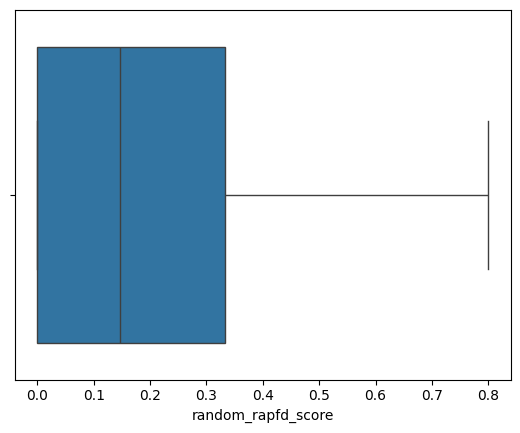

In [45]:
sns.boxplot(data=overall_df[ overall_df.llm_model=="deepseek_coder" ], x="random_rapfd_score")

<Axes: xlabel='rapfd_score'>

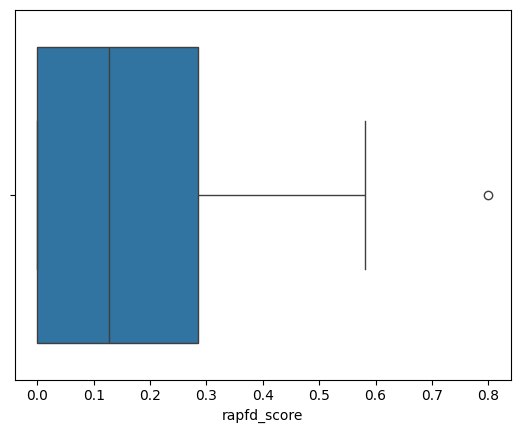

In [46]:
sns.boxplot(data=overall_df[ overall_df.llm_model=="deepseek_coder" ], x="rapfd_score")

/tmp/ipykernel_361380/239280698.py:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_medians = rapfd_melted.groupby(['llm_model', 'Metric'])['Score'].median()


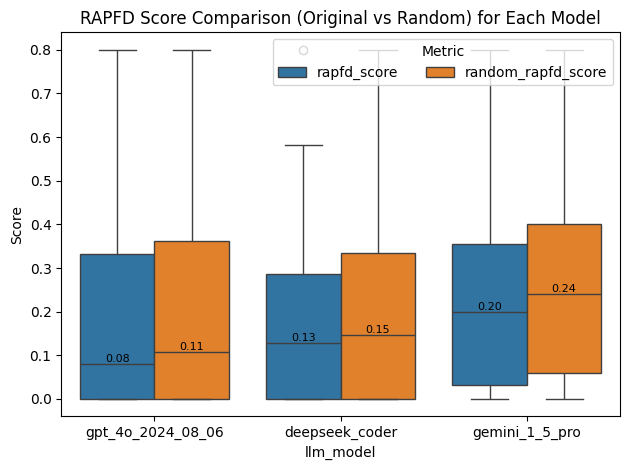

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Melt both metrics for all models
rapfd_melted = overall_df.melt(
    id_vars='llm_model',
    value_vars=['rapfd_score', 'random_rapfd_score'],
    var_name='Metric',
    value_name='Score'
)

# Define explicit order
model_order = rapfd_melted['llm_model'].unique()
hue_order = ['rapfd_score', 'random_rapfd_score']

# Create boxplot with defined order
ax = sns.boxplot(
    data=rapfd_melted,
    x='llm_model',
    y='Score',
    hue='Metric',
    order=model_order,
    hue_order=hue_order
)

# Compute medians
group_medians = rapfd_melted.groupby(['llm_model', 'Metric'])['Score'].median()

# Annotate each box with its median
for i, model in enumerate(model_order):
    for j, metric in enumerate(hue_order):
        median_val = group_medians[model, metric]
        # offset = width of bars in boxplot is 0.8 by default
        x_pos = i - 0.2 + 0.4 * j  # Adjust for side-by-side hue boxes
        ax.text(
            x_pos,
            median_val,
            f"{median_val:.2f}",
            ha='center',
            va='bottom',
            fontsize=8,
            color='black'
        )

# Final layout
plt.title("RAPFD Score Comparison (Original vs Random) for Each Model")
plt.xticks(rotation=0)
plt.legend(
    title='Metric',
    loc='upper right',
    ncol=2,
)
plt.tight_layout()
plt.savefig("image/rapfd_comparisson_boxplot", bbox_inches='tight')
plt.show()


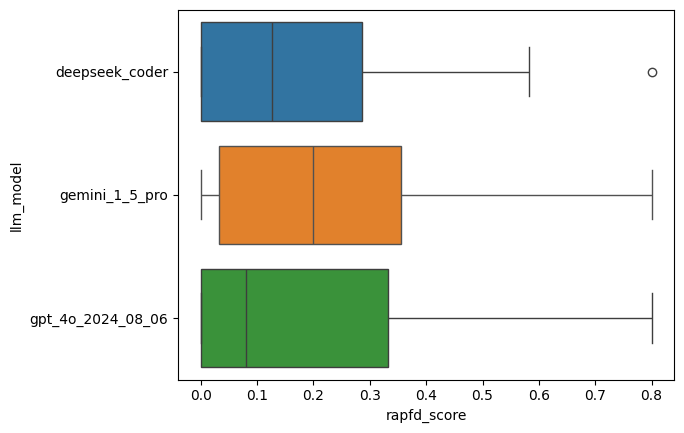

In [48]:
for model in overall_df.llm_model.cat.categories:
    sns.boxplot(data=overall_df[ overall_df.llm_model==model ], x="rapfd_score", y="llm_model")

# sns.boxplot(data=overall_df, x="mutation_score", y="llm_model")
# plt.savefig("image/mutation_score_per_llm_boxplot", bbox_inches='tight')


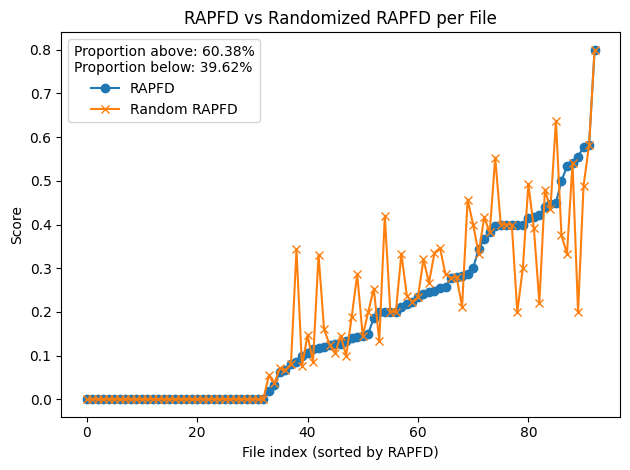

In [49]:
import matplotlib.pyplot as plt

# Assuming df has columns: ['file_id', 'rapfd_score', 'random_rapfd_score']
df_sorted = overall_df[ overall_df.llm_model=="deepseek_coder" ].sort_values('rapfd_score')  # Sort for visual clarity

plt.plot(df_sorted['rapfd_score'].values, label='RAPFD', marker='o')
plt.plot(df_sorted['random_rapfd_score'].values, label='Random RAPFD', marker='x')

# Calculate differences
import numpy as np
diff = df_sorted["random_rapfd_score"] - df_sorted["rapfd_score"]  # positive = above, negative = below

# Compute weighted totals
total_above = np.sum(diff[diff > 0])  # sum of positive differences
total_below = np.abs(np.sum(diff[diff < 0]))  # sum of negative differences (as positive value)

# Optional: also compute proportions
total_weight = np.sum(np.abs(diff))
prop_above = total_above / total_weight if total_weight != 0 else 0
prop_below = total_below / total_weight if total_weight != 0 else 0
summary = (
    f"Proportion above: {prop_above:.2%}\n"
    f"Proportion below: {prop_below:.2%}"
)

plt.xlabel("File index (sorted by RAPFD)")
plt.ylabel("Score")
plt.title("RAPFD vs Randomized RAPFD per File")
plt.legend(title=f"{summary}")
plt.tight_layout()
plt.show()

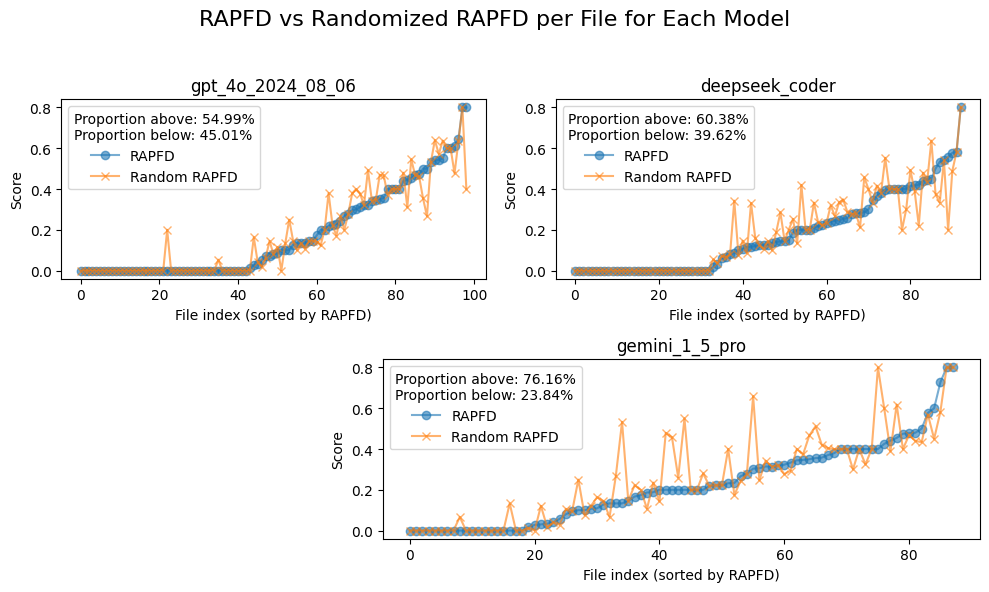

In [50]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np

# Get exactly 3 models
models = overall_df.llm_model.unique()
assert len(models) == 3, "This layout works for exactly 3 models."

# Create figure with 2 rows, 2 columns
fig = plt.figure(figsize=(10, 6))
gs = gridspec.GridSpec(2, 2)

# Top row: 2 side-by-side plots
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])

# Bottom row: center the third plot by placing it in a new GridSpec below the first two
# Trick: use subgridspec for a centered axis in the second row
gs_bottom = gs[1, :].subgridspec(1, 3)
ax3 = fig.add_subplot(gs_bottom[0, 1:])  # span middle and right column

axes = [ax1, ax2, ax3]

# Plot logic for each model
for ax, model in zip(axes, models):
    df_sorted = overall_df[overall_df.llm_model == model].sort_values('rapfd_score')

    rapfd = df_sorted['rapfd_score'].values
    random_rapfd = df_sorted['random_rapfd_score'].values

    # Plot
    ax.plot(rapfd, label='RAPFD', marker='o', alpha=0.6)
    ax.plot(random_rapfd, label='Random RAPFD', marker='x', alpha=0.6)

    # Compute stats
    diff = df_sorted["random_rapfd_score"] - df_sorted["rapfd_score"]  # positive = above, negative = below

    # Compute weighted totals
    total_above = np.sum(diff[diff > 0])  # sum of positive differences
    total_below = np.abs(np.sum(diff[diff < 0]))  # sum of negative differences (as positive value)
    
    # Optional: also compute proportions
    total_weight = np.sum(np.abs(diff))
    prop_above = total_above / total_weight if total_weight != 0 else 0
    prop_below = total_below / total_weight if total_weight != 0 else 0
    summary = (
        f"Proportion above: {prop_above:.2%}\n"
        f"Proportion below: {prop_below:.2%}"
    )

    ax.set_title(model)
    ax.set_xlabel("File index (sorted by RAPFD)")
    ax.set_ylabel("Score")
    ax.legend(title=summary)

# Layout and title
plt.suptitle("RAPFD vs Randomized RAPFD per File for Each Model", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("image/rapfd_vs_random_triangle", bbox_inches='tight')
plt.show()


In [63]:
per_test = pd.read_csv("per_test.csv")
per_test.is_failed = per_test.is_failed.astype(int)
per_test

test_name  per_test_score  \
0     test_gpt_4o_2024_08_06_four_is_magic.TestMagic...        0.000000   
1     test_gpt_4o_2024_08_06_four_is_magic.TestMagic...        0.000000   
2     test_gpt_4o_2024_08_06_four_is_magic.TestMagic...        0.000000   
3     test_gpt_4o_2024_08_06_four_is_magic.TestMagic...        0.000000   
4     test_gpt_4o_2024_08_06_four_is_magic.TestMagic...        0.000000   
...                                                 ...             ...   
1814  test_gpt_4o_2024_08_06_fivenum.TestFiveNum.tes...        0.208333   
1815  test_gpt_4o_2024_08_06_fivenum.TestFiveNum.tes...        0.250000   
1816  test_gpt_4o_2024_08_06_fivenum.TestFiveNum.tes...        0.041667   
1817  test_gpt_4o_2024_08_06_fivenum.TestFiveNum.tes...        0.041667   
1818  test_gpt_4o_2024_08_06_fivenum.TestFiveNum.tes...        0.000000   

      is_failed  
0             1  
1             1  
2             1  
3             1  
4             1  
...         ...  
1814          0  
1815          0  
1816          1  
1817          1  
1818          1  

[1819 rows x 3 columns]

In [67]:
from scipy.stats import mannwhitneyu

# Split the data based on the binary column 'x'
group0 = per_test[per_test['is_failed'] == 0]['per_test_score'].dropna()
group1 = per_test[per_test['is_failed'] == 1]['per_test_score'].dropna()

# Perform the Mann–Whitney U test
stat, p_value = mannwhitneyu(group0, group1, alternative='two-sided')

print(f"Mann–Whitney U statistic: {stat:.3f}")
print(f"p-value: {p_value:.5f}")

Mann–Whitney U statistic: 475464.500
p-value: 0.00000


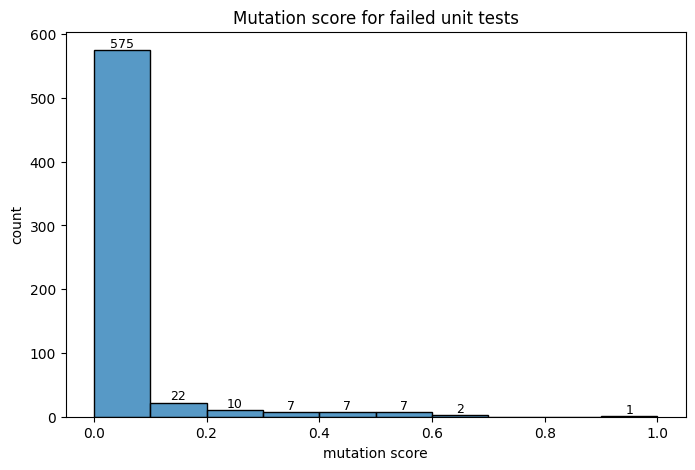

In [91]:
failed_unit_tests = per_test[per_test['is_failed'] == 1]

# Plot histogram
plt.figure(figsize=(8, 5))
ax = sns.histplot(failed_unit_tests["per_test_score"], bins=10)

# Add bin labels on top of each bar
for patch in ax.patches:
    height = patch.get_height()
    if height > 0:  # Skip empty bins
        plt.text(patch.get_x() + patch.get_width() / 2,
                 height,
                 f'{height:.0f}',  # or f'{height:.2f}' for decimals
                 ha='center',
                 va='bottom',
                 fontsize=9)

plt.title('Mutation score for failed unit tests')
plt.xlabel('mutation score')
plt.ylabel('density' if ax.get_ylabel() == 'Density' else 'count')
plt.savefig("image/failed_unit_tests_mutation_score_binned", bbox_inches='tight')
plt.show()

## Experimental continuation - PCA, feature selection, ...
### PCA and Feature Selection

In [52]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

feature_df = overall_df.drop(overall_df.columns[overall_df.isna().all()],axis=1).dropna()

classic_metrics = [
    "branch_coverage_score",
    "assertions_mccabe_ratio_score",
]

new_metrics = classic_metrics + ["mutation_score"]

X = StandardScaler().fit_transform(feature_df[new_metrics])

print([(idx,col) for idx,col in enumerate(new_metrics)])

pca = PCA(n_components=len(new_metrics))
pca.fit(X)

print([(idx,float(var)) for idx,var in enumerate(pca.explained_variance_ratio_)])

[(0, 'branch_coverage_score'), (1, 'assertions_mccabe_ratio_score'), (2, 'mutation_score')]
[(0, 0.5323870833181266), (1, 0.3322334271586624), (2, 0.135379489523211)]


In [53]:
from sklearn.feature_selection import mutual_info_regression

X = feature_df[classic_metrics]
y = feature_df['mutation_score']
mi = mutual_info_regression(X, y)
print(pd.Series(mi, index=X.columns))

branch_coverage_score            0.378510
assertions_mccabe_ratio_score    0.113463
dtype: float64
